# GA-20

In [1]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [2]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [3]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [4]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    selected_indiviuals=np.array(selected_indiviuals_list)
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals



In [5]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [6]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [7]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    chromosome_pop=np.array(mutated_pop)
    #print("chromo mutated pop: ", len(chromosome_pop))
    return chromosome_pop


In [8]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)
    # print(delta_fitness)

    # Check if the difference is smaller than a small threshold
    if delta_fitness>=0 and delta_fitness<=2:
      return True
    else:
      return False

In [9]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [10]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:00:38] |******************************************** | (498) 

best chromosome:  [-46 -65]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.001
best score stanard deviation:  0.011
worst score accuracy:  0.0
worst score standard deviation:  0.0


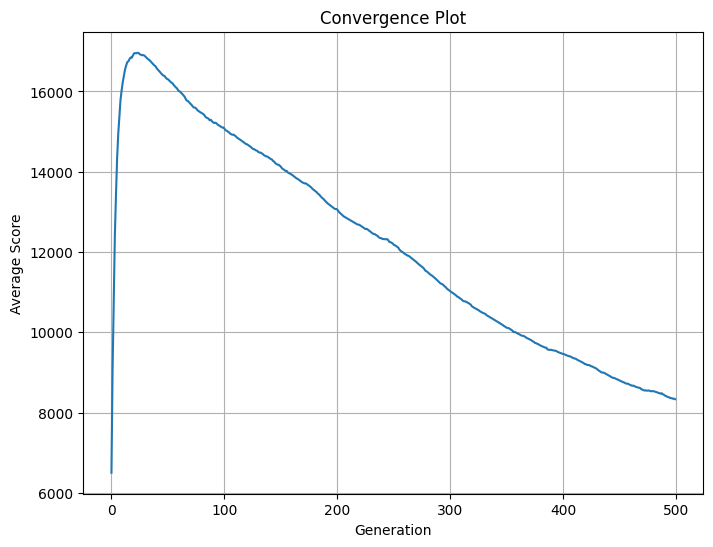

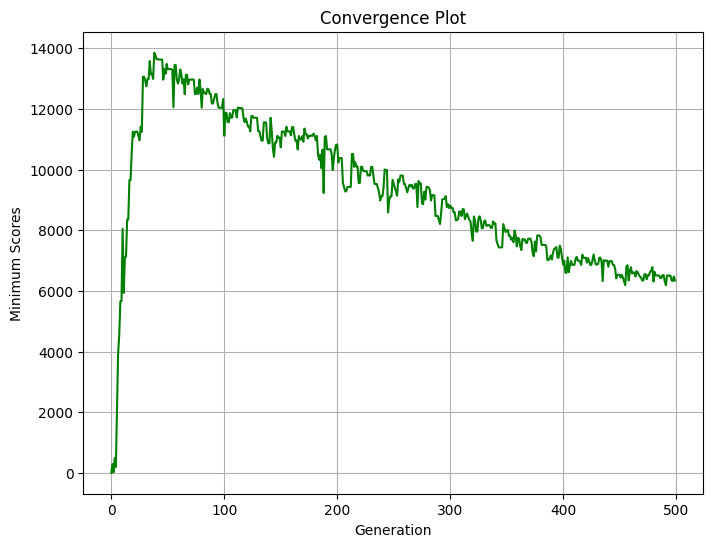

In [11]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,0)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-1


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(n_feat,sz):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


best chromosome:  [ 9.87340987 -1.34433512]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.684
best score stanard deviation:  12.185
worst score accuracy:  0.0
worst score standard deviation:  0.0


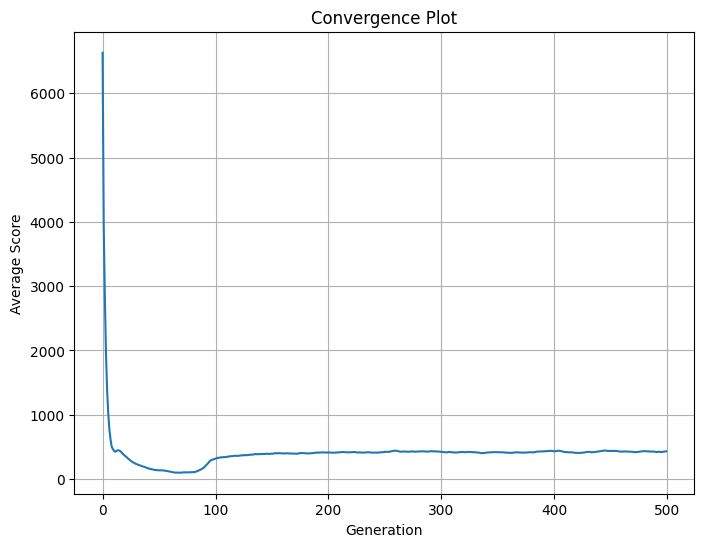

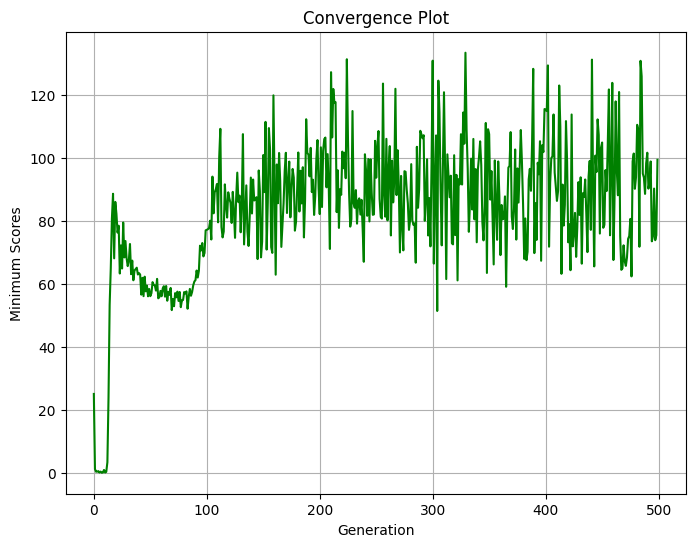

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,5000)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-2


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(n_feat,sz):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


best chromosome:  [2.2870501  4.31203355]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.587
best score stanard deviation:  5.063
worst score accuracy:  0.0
worst score standard deviation:  0.0


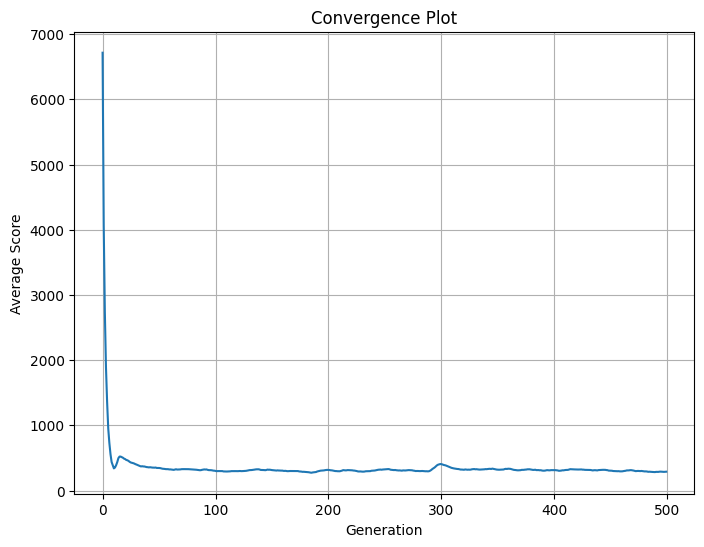

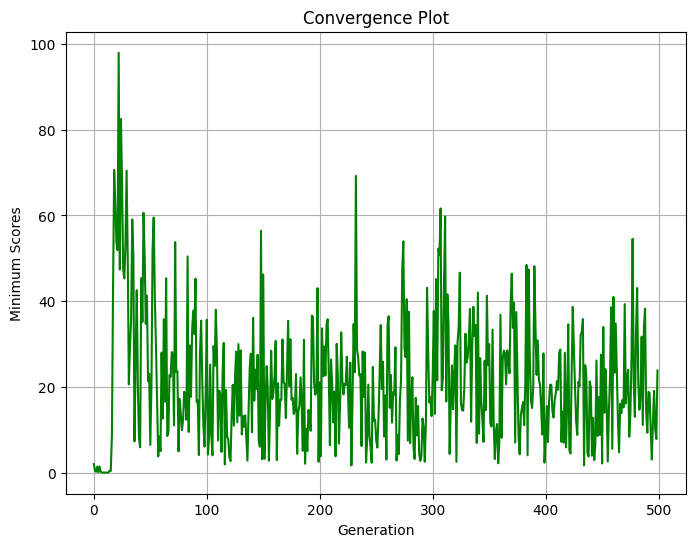

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,5000)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-3



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(n_feat,sz):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if sz>1 :

          if j==i :
             if j==0:
              j+=1
          else:
              if j==sz-1:
                j-=1
        # print(j)
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        if np.random.rand()>0.0:
          for k in range(len(mask)):
             if mask[k] == 1:
                  temp=c1[k]
                  c1[k]=c2[k]
                  c2[k]=temp
          pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


best chromosome:  [98 99]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.001
best score stanard deviation:  0.01
worst score accuracy:  0.003
worst score standard deviation:  0.0


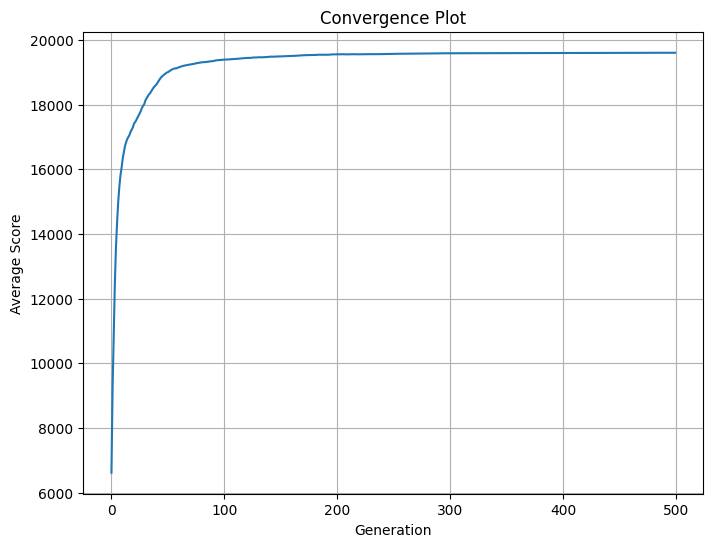

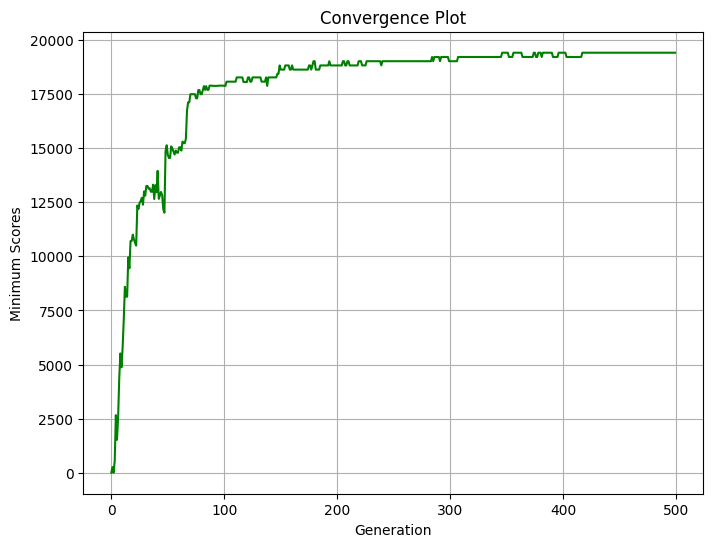

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,5000)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-4

In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
def initialize(n_feat,sz):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    selected_indiviuals=np.array(selected_indiviuals_list)
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    chromosome_pop=np.array(mutated_pop)
    #print("chromo mutated pop: ", len(chromosome_pop))
    return chromosome_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


best chromosome:  [-57 -60]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.001
best score stanard deviation:  0.01
worst score accuracy:  0.002
worst score standard deviation:  0.045


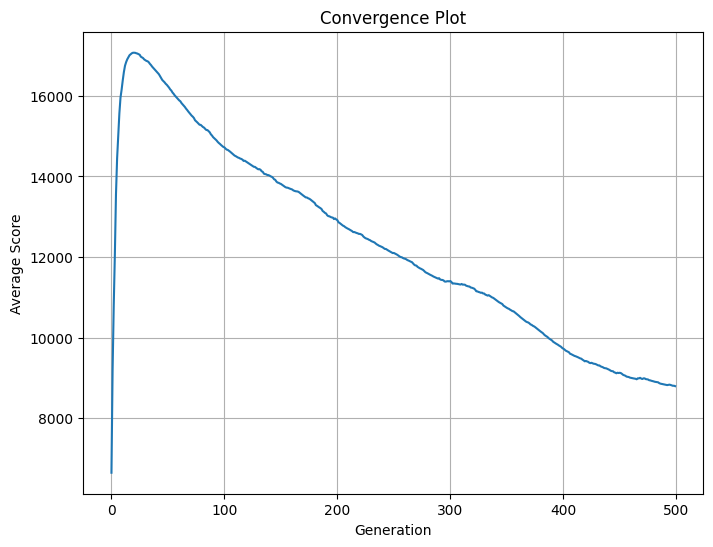

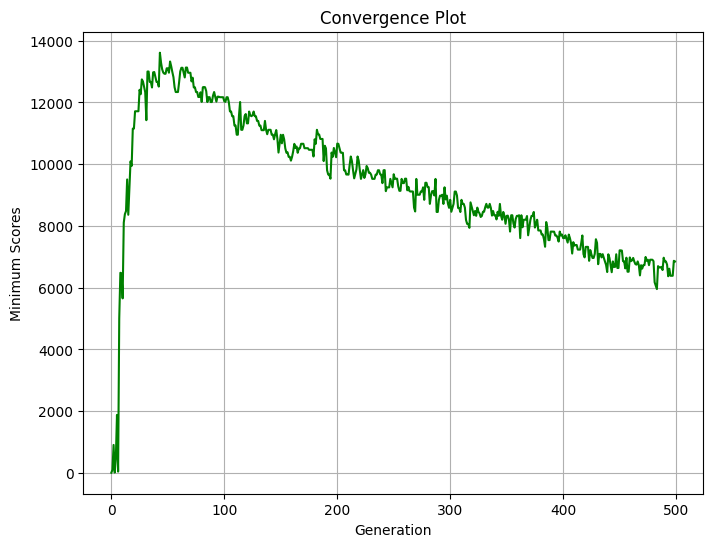

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,5000)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-5



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc
from datetime import datetime as dt

In [ ]:
def initialize(n_feat,sz):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [ ]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [ ]:
def rank_based_prob(scores):
    dt1=dt.now()
    # print("sorting started..")
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    dt2=dt.now()
    # print("time taken in sorting:", dt2-dt2)
    dt3=dt.now()
    # print("selection prob started..")
    selection_probabilities = 1 - np.exp(-1*(ranks))
    dt4=dt.now()
    # print("time taken in probability list: ",dt4-dt3,"\n===========================================")
    selection_probabilities /= ranks.sum()
    return selection_probabilities

In [ ]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    dt1=dt.now()
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                dt2=dt.now()
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    dt4=dt.now()
                    # print("current pick: ",dt4-dt2)
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    dt3=dt.now()
    # print("selection done: ",dt3-dt1)
    return population_nextgen

In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/4)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:56:36] |******************************************** | (499) 

best chromosome:  [-381.89759023 -378.70595113]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.0
best score stanard deviation:  0.006
worst score accuracy:  0.0
worst score standard deviation:  0.0


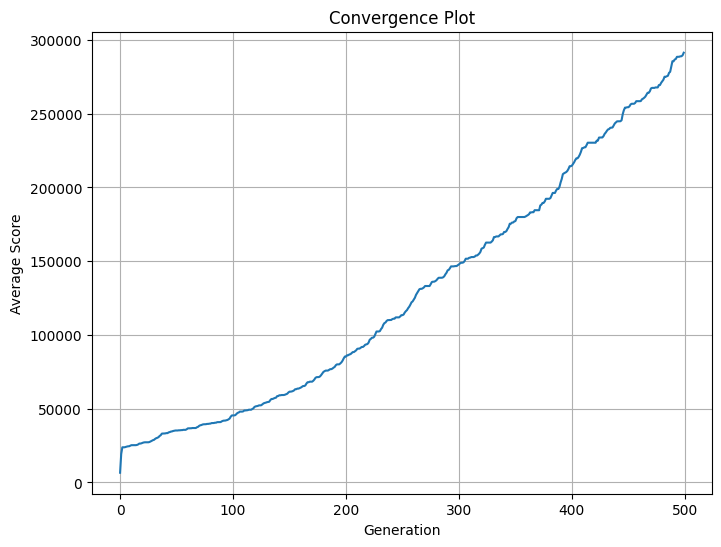

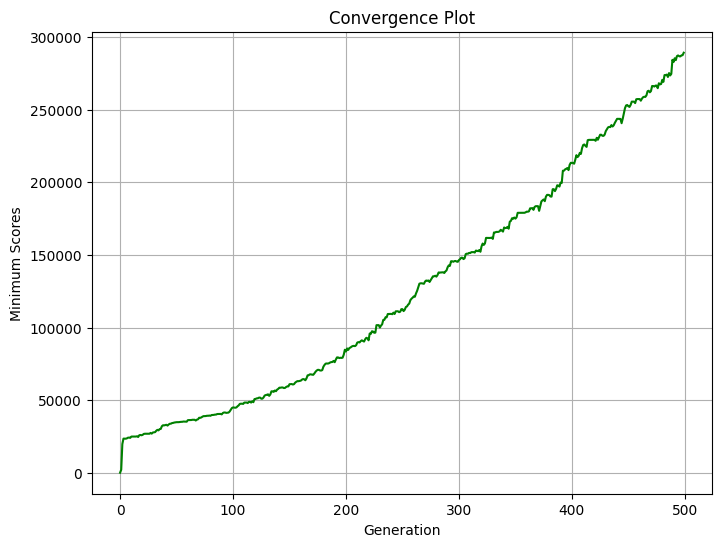

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,5000)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-6



In [1]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [2]:
def initialize(n_feat,sz):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [3]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [4]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [5]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [6]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [7]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/4)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [8]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [9]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [10]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:10:29] |******************************************** | (499) 

best chromosome:  [ 2.23046668 -1.96854253]
average score  accuracy:  0.028
average score standard deviation:  0.004
best score accuracy:  1.18
best score stanard deviation:  16.678
worst score accuracy:  0.0
worst score standard deviation:  0.0


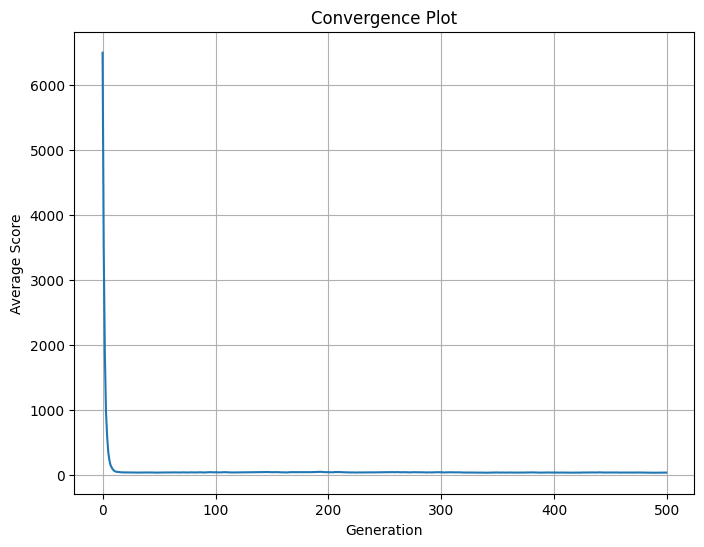

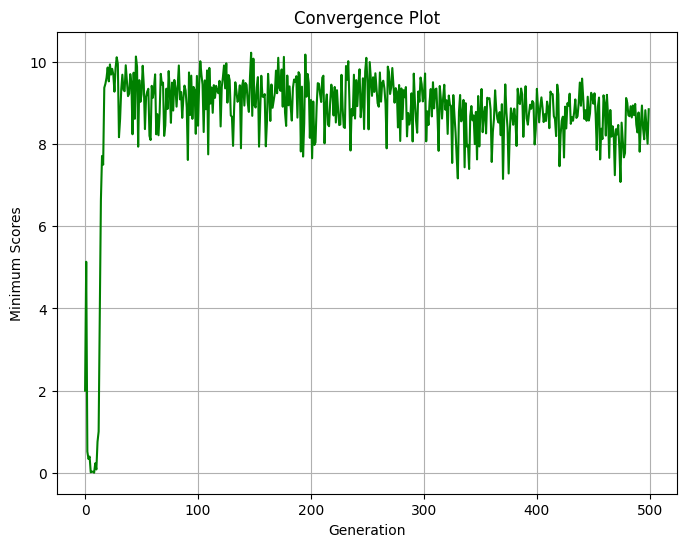

In [11]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-7



In [1]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [2]:
def initialize(n_feat,sz):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [3]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [4]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [5]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [6]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [7]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [8]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [9]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [10]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:10:05] |******************************************** | (499) 

best chromosome:  [0 0]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.998
best score stanard deviation:  0.034
worst score accuracy:  0.0
worst score standard deviation:  0.0


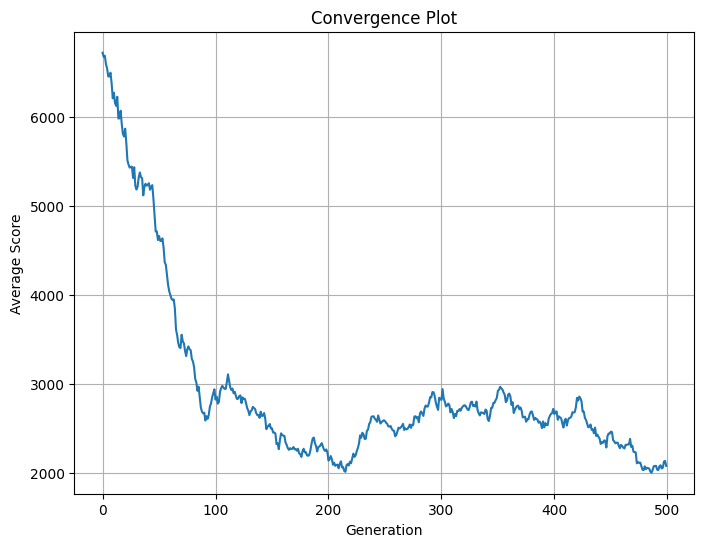

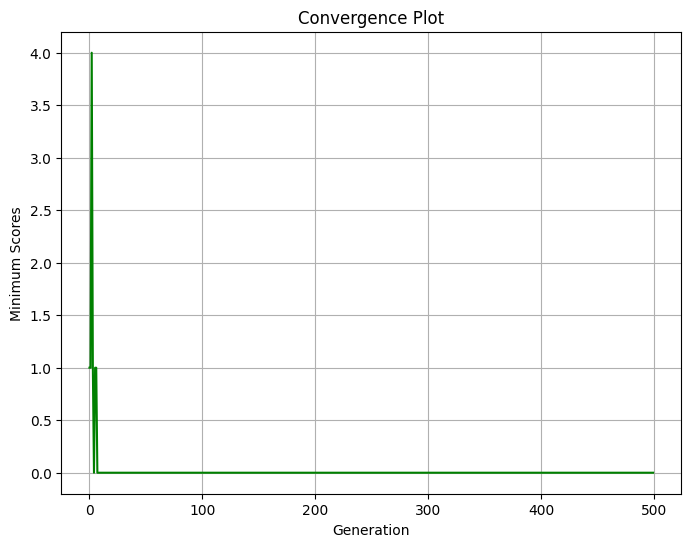

In [11]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-8



In [2]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [14]:
def initialize(n_feat,sz):
    population=[]
    data=[[-14, 10], [15, 7], [18, 0], [-20, 17], [14, -1], [8, -18], [-17, -20], [-9, 14], [20, 13], [-16, -13], [-6, -6], [12, -20], [20, -11], [2, -12], [14, 2], [14, 5], [-12, 14], [-19, 15], [7, 1], [18, 6], [3, 12], [16, -5], [6, -4], [10, -12], [12, 11], [11, -14], [18, 12], [-12, 5], [-18, -18], [1, -18], [-2, -19], [4, 10], [19, 3], [10, 4], [15, 11], [19, 5], [-4, -20], [-20, -5], [16, 8], [17, 15], [5, 10], [4, -5], [19, -1], [15, 11], [6, 16], [12, 5], [-15, 14], [-1, 6], [14, 1], [-11, 5], [-7, 2], [1, -3], [-2, 16], [-11, 12], [-9, 20], [-12, 14], [12, -4], [-1, 8], [-8, -2], [-10, 16], [7, -20], [6, -14], [1, -18], [-5, 14], [-3, 9], [-12, 4], [19, -9], [16, 10], [-5, 12], [6, -3], [18, 6], [-10, 10], [3, -4], [-12, -14], [19, -8], [1, 18], [-10, -6], [6, -12], [-18, 15], [3, 10], [11, 3], [17, 11], [-8, 12], [18, -12], [11, 1], [-4, -16], [-18, 9], [16, -1], [14, -16], [-13, -13], [-8, 0], [-15, -2], [14, -17], [-15, 8], [0, 18], [-6, 19], [5, -8], [18, -17], [-6, -16], [10, 11], [1, 13], [17, 8], [15, 13], [18, -17], [2, -7], [17, -13], [7, -19], [-20, -14], [-8, -1], [8, 3], [-14, -3], [-1, 11], [-3, -4], [9, -16], [12, 0], [-12, -17], [4, -2], [-1, 9], [-19, 11], [4, -7], [8, -13], [16, -8], [-5, -18], [14, 4], [-4, -8], [-6, 10], [-5, -5], [18, -18], [-9, 20], [8, 16], [-19, -20], [-4, -11], [16, 14], [-11, -4], [-17, 20], [18, -2], [20, 5], [15, -7], [17, -4], [12, 17], [15, 7], [14, 0], [19, 9], [-10, -16], [-5, -16], [0, 6], [0, -14], [-17, -15], [13, 15], [14, 1], [13, -19], [20, 0], [19, -13], [9, 10], [-16, 3], [-5, 0], [9, -6], [13, -18], [4, -11], [13, -7], [19, 19], [4, -15], [-17, 11], [-1, -12], [-8, 12], [2, 12], [6, -5], [-11, -11], [-8, -12], [15, -19], [-16, -15], [-11, -13], [11, 18], [-11, 4], [-7, -16], [15, 14], [-9, 0], [-14, -20], [3, -3], [11, 16], [-4, 19], [11, -3], [-6, -18], [-9, -11], [-12, 18], [-7, 2], [10, 20], [-8, 13], [16, 4], [14, -16], [-19, 16], [-7, -8], [10, 6], [6, 17], [-4, 15], [10, -18], [-17, 11], [19, 2], [2, 14], [-9, 6], [15, -19], [-13, -4], [6, -5], [7, -9], [-17, -1], [11, 7], [17, -7], [20, -5], [18, 16], [-13, -20], [-19, -7], [6, 2], [10, -9], [9, -18], [3, -2], [-10, 15], [-20, -5], [10, 17], [7, 20], [9, -11], [19, -19], [-10, 18], [-15, -17], [-8, 2], [15, 20], [-5, 11], [-3, -19], [-2, -2], [-19, 15], [18, 15], [-7, -13], [15, -12], [2, 2], [20, -18], [10, 0], [-7, -10], [18, -17], [10, -14], [9, -4], [0, -1], [-13, -17], [1, -19], [17, 16], [1, 9], [-20, 0], [-19, -20], [-8, -10], [-2, 18], [-11, 0], [-17, -11], [9, -8], [-11, -6], [3, -11], [-4, 3], [-6, 7], [-20, -12], [7, -12], [0, 11], [-10, -17], [-18, 19], [-12, 7], [-19, -5], [-1, 5], [-14, 12], [2, 15], [12, 5], [-12, -15], [20, 0], [-20, -11], [13, -10], [-12, -6], [17, 16], [13, -18], [-11, -8], [-15, -20], [18, -9], [-14, -15], [-16, -5], [-11, -15], [-13, 13], [-11, -20], [-1, 11], [10, 11], [15, -6], [-16, 7], [-4, -1], [20, -11], [9, -8], [-8, -9], [-1, -3], [-9, -8], [-14, -6], [19, -3], [20, -20], [15, 2], [18, -19], [-17, 3], [16, -9], [9, 2], [0, -1], [10, -2], [-16, 20], [6, -4], [-10, -6], [-17, 4], [19, 11], [3, 9], [11, 17], [-15, -15], [-6, 18], [-19, 17], [19, 2], [12, 1], [-7, -8], [-16, -3], [15, 18], [-18, -5], [18, 19], [17, 11], [3, 10], [3, -1], [-12, -5], [-2, 17], [-10, -8], [18, -12], [5, 9], [-16, -7], [6, -4], [8, 13], [-16, 11], [9, -8], [-8, 10], [-7, -14], [5, 2], [-18, -17], [12, 3], [2, -2], [8, -4], [-8, 2], [-7, 6], [10, 0], [11, 14], [9, -5], [-6, 7], [-19, 10], [-19, 15], [-4, 1], [15, 3], [7, -14], [-9, 6], [-19, 20], [-7, -16], [-7, 5], [-10, -7], [17, 0], [20, -17], [-2, 16], [-7, 4], [-7, -18], [-2, 13], [-9, -8], [3, -11], [20, -15], [16, -19], [-6, -18], [6, 17], [10, 11], [11, -4], [-11, 14], [19, 18], [12, 0], [-1, -12], [-5, -7], [-5, -17], [-10, -6], [-1, 3], [15, -15], [0, 2], [-1, -11], [-19, 9], [10, -14], [-20, 3], [4, -10], [-5, 20], [-1, 6], [6, 1], [11, 5], [-6, 8], [3, 18], [4, 13], [2, 13], [7, -11], [11, 2], [-2, 0], [-18, 15], [-4, -5], [-15, -10], [20, -19], [-10, -8], [-11, 13], [2, 20], [12, -16], [-10, 14], [-3, 12], [-3, -19], [-9, 13], [-3, -11], [4, 3], [2, 9], [9, 17], [-10, 6], [18, -16], [-10, 14], [-11, 7], [-12, -16], [-12, -16], [10, -2], [9, 2], [6, -17], [-16, -6], [0, 2], [-7, -3], [0, -9], [-16, -9], [8, 6], [-12, -3], [14, -1], [-17, 5], [18, 18], [-8, 3], [-10, -2], [6, 11], [0, -1], [-7, -19], [12, -10], [-14, -19], [-13, -12], [-10, -11], [-11, 18], [5, 17], [12, -8], [16, 6], [-12, -13], [2, -9], [5, 14], [10, 0], [-19, -10], [18, -15], [-3, -19], [20, 19], [-10, -12], [20, -14], [3, -12], [-1, -15], [17, -4], [-11, -15], [16, -15], [-20, 6], [-1, 9], [-11, -15], [-9, 15], [-3, -5], [16, -6], [-15, 3], [-13, 9], [8, -12], [15, 18], [11, -6], [9, 16], [3, -2], [11, 16], [4, -13], [-11, 9], [-13, -8], [-3, -2], [0, 19], [12, 5], [-8, 4], [19, 6], [-6, -3], [-8, 4], [-20, 0], [-15, -11], [-1, 9], [-6, -12], [-3, 15], [14, 10], [19, -20], [4, 8], [-2, 1], [-7, -10], [-20, 15], [-7, -8], [15, 2], [-8, -5], [-17, 2], [-16, -10], [18, -5], [-3, 10], [-2, 15], [7, 5], [6, 7], [-10, 7], [16, 5], [4, -12], [-6, -8], [5, 14], [12, -11], [0, -8], [-15, -12], [-19, -20], [-17, -16], [-3, -17], [12, -1], [-16, 13], [3, -11], [19, 7], [19, 18], [-6, -15], [-6, -9], [16, -9], [-8, 20], [11, -6], [-9, -16], [-4, 11], [-6, 12], [-7, -6], [9, 5], [-18, 11], [16, 15], [-18, -13], [-5, -14], [17, 0], [15, 20], [4, 0], [16, 6], [-13, 9], [-7, 3], [7, 7], [18, 3], [18, -18], [-10, 11], [-11, 3], [8, 16], [6, 8], [-11, -3], [5, -8], [14, 11], [-4, -3], [-5, 19], [-3, 13], [-13, -8], [1, -18], [-16, 14], [9, -17], [10, -16], [-10, -19], [-12, 7], [-20, 0], [-1, -15], [11, 2], [4, 2], [-18, 15], [20, 16], [9, -17], [6, -11], [10, -3], [-4, -17], [-4, 5], [20, 1], [13, -12], [11, 14], [-15, 6], [12, 0], [20, 17], [20, -4], [8, 14], [11, 7], [1, -19], [12, 17], [-13, -11], [2, -2], [10, 8], [20, 7], [20, 6], [-7, 14], [-6, 5], [2, -20], [2, 10], [-16, -1], [11, 16], [-6, -10], [18, -14], [17, 9], [-17, 15], [10, 20], [18, -19], [7, 14], [-9, 2], [-8, -4], [-7, -7], [10, 18], [-4, 20], [-15, 18], [-8, -10], [-11, -14], [-7, -8], [-14, -20], [1, -17], [-17, -14], [-4, -4], [10, 19], [16, 9], [-7, -17], [16, 13], [18, 11], [-11, -16], [-15, -15], [-16, 0], [19, -4], [-19, 1], [-2, 16], [16, 7], [12, 10], [-8, 12], [-17, 13], [1, 19], [14, 17], [13, 0], [-15, 2], [-13, 9], [-17, -15], [-4, 19], [-17, 12], [20, -5], [20, -15], [-10, -4], [11, 5], [-9, 18], [-7, 18], [-12, -13], [9, 10], [20, 0], [-1, 17], [5, -20], [-12, -4], [8, 5], [-17, -16], [13, -18], [-7, 14], [-5, -2], [-19, 15], [13, -15], [-2, 18], [7, -11], [20, 8], [12, -20], [13, 0], [-2, 6], [19, -14], [4, 14], [8, 5], [-20, 19], [-13, 2], [2, -16], [17, 2], [-18, 14], [14, 16], [14, 10], [4, -18], [-18, -3], [-15, 8], [-5, -3], [-2, 0], [7, -8], [-15, -17], [-11, 16], [1, 10], [12, -7], [-4, -2], [-14, -18], [7, -4], [19, 20], [14, 17], [-20, -16], [2, 5], [-16, -12], [13, 13], [-4, -18], [1, -20], [10, 12], [1, 19], [13, -16], [12, -8], [4, 2], [16, 17], [12, -17], [-20, 19], [2, -3], [8, -8], [-12, 7], [3, -8], [-11, 2], [1, 7], [5, -19], [8, -6], [5, 11], [20, -8], [12, -17], [-14, -12], [-4, -13], [18, 6], [-4, -4], [5, 18], [1, -7], [18, 17], [-20, 7], [3, 8], [9, 4], [16, 12], [8, -19], [-17, -18], [-16, -13], [-3, -17], [19, -18], [10, 15], [-5, 1], [-12, 0], [-19, -3], [5, -18], [-18, -7], [-7, 6], [6, 13], [-1, 6], [-11, 4], [-7, -17], [19, -8], [-1, 12], [13, 11], [-15, 18], [15, 4], [-9, -10], [6, -1], [-2, -11], [12, -15], [18, 17], [4, 15], [11, 19], [6, 10], [17, 15], [4, 3], [-2, -12], [3, 1], [10, -12], [14, -4], [1, 12], [-5, 20], [2, 7], [-18, 14], [-8, 15], [-19, 6], [-10, -3], [2, 11], [-11, -1], [18, 1], [-6, 2], [-10, 17], [-4, 15], [-5, -14], [-18, -14], [-9, 11], [13, 5], [-10, -19], [15, 8], [-18, -17], [-11, -16], [-1, -16], [-12, 16], [-10, -10], [12, 17], [-11, 7], [-18, -2], [15, -7], [-20, 1], [10, 5], [-10, -8], [1, 4], [15, 5], [9, -12], [20, -18], [9, 4], [15, 16], [-18, -1], [1, 19], [-12, -20], [-11, -6], [-14, -5], [-15, -5], [-3, -6], [14, 16], [10, 16], [-14, -13], [-3, 16], [-4, -8], [1, -10], [2, -3], [0, 7], [12, -14], [-14, 1], [1, -3], [-2, -5], [13, 5], [-18, 4], [-20, 0], [-14, 3], [-14, 1], [7, -1], [-6, -4], [1, -10], [-4, 3], [13, 7], [-19, 18], [7, 20], [-5, 11], [-16, -15], [-10, 6], [-7, 12], [14, -7], [-11, -12], [6, -10], [2, -18], [-12, 15], [1, -14], [19, -11], [-17, -19], [9, 1], [-6, 2], [-11, 0], [4, -16], [-6, -11], [-17, 16], [-9, -12], [-14, -19], [14, 16], [1, -19], [2, -5], [18, -20], [13, -8], [-4, 8], [9, 17], [-18, -19], [-19, 6], [1, 20], [9, 12], [7, 1], [-17, -13], [-17, 20], [-7, 7], [-14, 14], [-13, -7], [9, 15], [14, -18], [4, 14], [-3, 3], [-20, -18], [12, -15], [-16, -4], [-10, 6], [-15, -13], [-5, 15], [19, -8], [-4, -14], [13, 4], [-6, -16], [5, -1], [8, 19], [-11, -10], [17, -18], [-17, -8], [-19, 19], [-10, 3], [-18, 15], [10, -14], [-15, 20], [20, -18], [17, 14], [-3, -20], [3, -5], [-19, -10], [0, -12], [-6, 11], [11, -1], [-8, 13], [-4, 3], [17, -7], [6, 7], [1, -10], [-9, 10], [8, -3], [-9, -4], [-14, -9], [17, 20], [-8, -13], [18, -20], [3, -5], [2, -8], [-12, 3], [1, 3], [10, -17], [-4, 4], [-11, 14], [-16, -8], [2, 13], [0, 2], [-19, 4], [9, -10], [-5, 10], [18, 14], [10, -4], [19, 3], [-16, -8], [-16, 2], [-12, -13], [-5, 8], [9, 18], [-19, 2], [-8, -17], [-13, -8], [15, -9], [-19, 1], [8, 5], [-1, 5], [14, -19], [14, 13], [19, -11], [-12, -18], [4, -5], [6, -2], [6, 6], [14, 13], [3, 3], [18, 2], [8, -19], [7, 16], [12, -14], [3, -12], [1, -14], [8, 4], [2, 5], [14, 11], [-11, -15], [1, -3], [-2, -20], [11, 18], [-1, 6], [-13, 4], [8, -1], [-11, 0], [-7, -9], [1, 16], [18, 9], [8, 20], [7, -7], [-19, -8], [15, -12], [-13, -5], [-17, 1], [7, -16], [11, 8], [-13, -7], [-4, 18], [3, 15], [5, -15], [17, 1], [-13, 17], [-14, 7], [-16, -11], [-1, -8], [12, -7], [4, -17], [9, 1], [7, 7], [1, 5], [20, -16], [-18, -12], [5, -1], [3, -3], [-10, 14], [17, -7], [11, 8], [-10, -4], [-15, -16], [8, 14], [10, 1], [14, -9], [18, -7], [-13, 4], [11, 8], [7, 14], [-6, 17]]

    for i in range(len(data)):
        chromosome=data[i]
        chromosome=np.array(chromosome)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    pop=np.array(population)
    np.random.shuffle(pop)
    return list(pop)

In [3]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [4]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [5]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [7]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [6]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [8]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [9]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [10]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:03:11] |******************************************** | (499) 

best chromosome:  [0 0]
average score  accuracy:  0.883
average score standard deviation:  0.745
best score accuracy:  1.0
best score stanard deviation:  0.0
worst score accuracy:  0.781
worst score standard deviation:  0.407


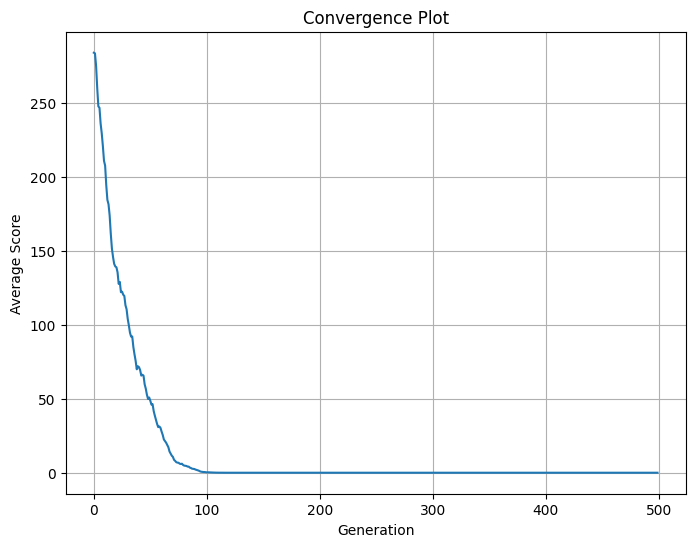

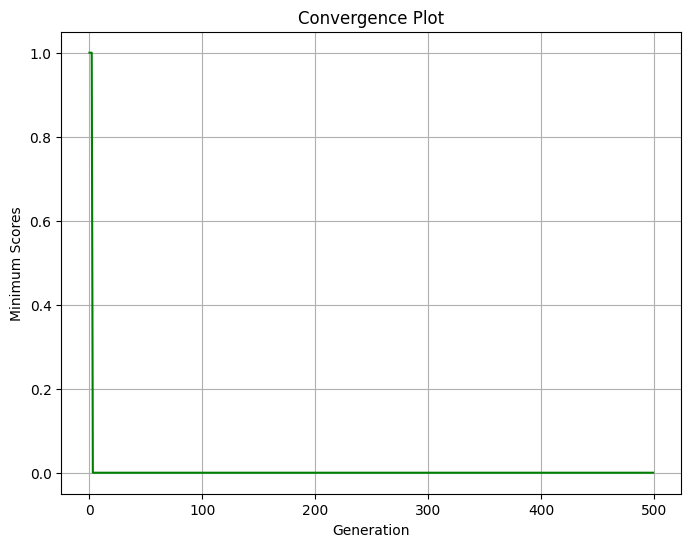

In [16]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,1)
    best_accuracy,bst_std=average_fraction(stats_min,1)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,1)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-9


In [1]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [2]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [3]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [4]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [5]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [6]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [7]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [8]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [9]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:24] |******************************************** | (499) 

best chromosome:  [ 1.89825737 12.13625298]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.019
best score stanard deviation:  0.104
worst score accuracy:  0.0
worst score standard deviation:  0.0


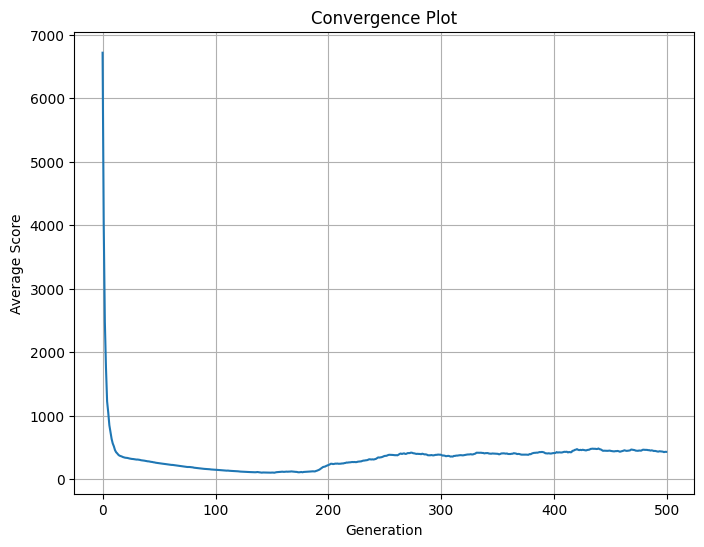

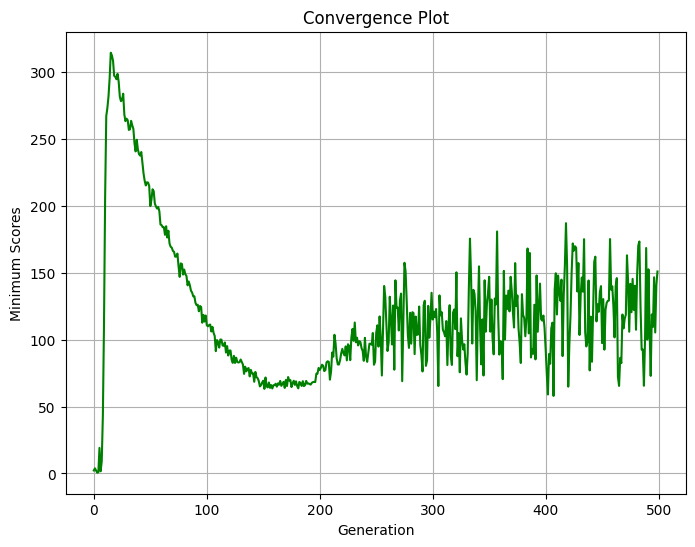

In [10]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,5000)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-10


In [1]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [2]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [3]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [4]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [5]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [6]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [7]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [8]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [9]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:30] |******************************************** | (497) 

best chromosome:  [-4.16158342  7.26263742]
average score  accuracy:  0.006
average score standard deviation:  0.003
best score accuracy:  0.019
best score stanard deviation:  0.058
worst score accuracy:  0.0
worst score standard deviation:  0.0


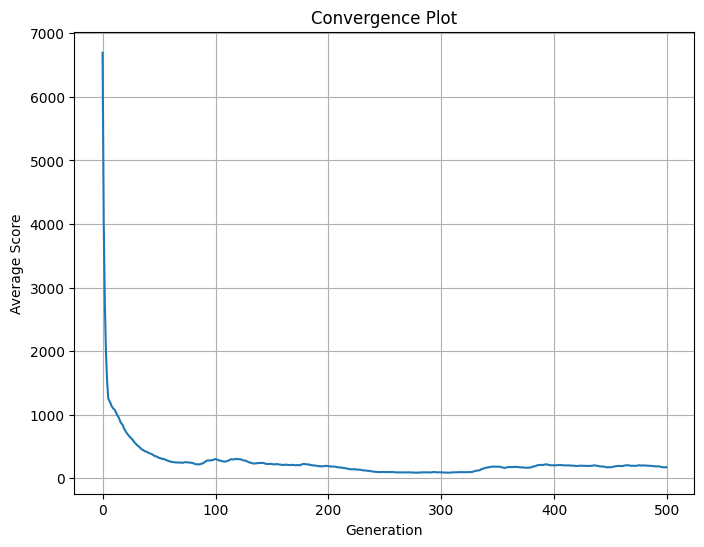

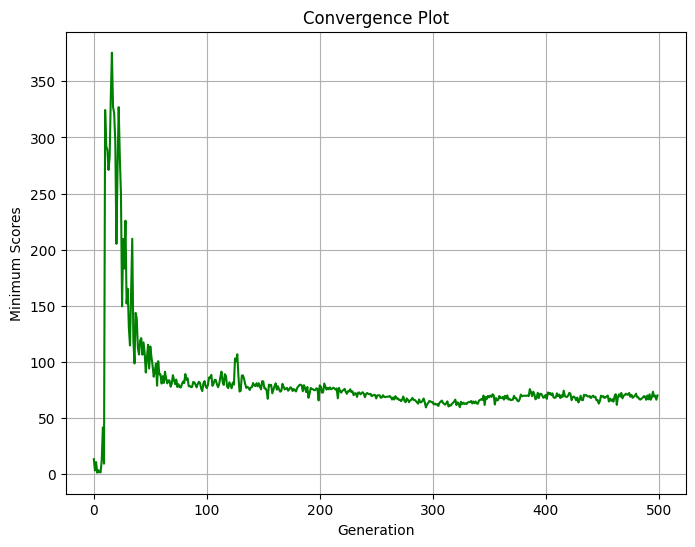

In [10]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-11


In [1]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [2]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [3]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [4]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [5]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [6]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [7]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [9]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [11]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:05] |******************************************** | (494) 

best chromosome:  [238.85125263 215.23940526]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.0
best score stanard deviation:  0.006
worst score accuracy:  0.0
worst score standard deviation:  0.002


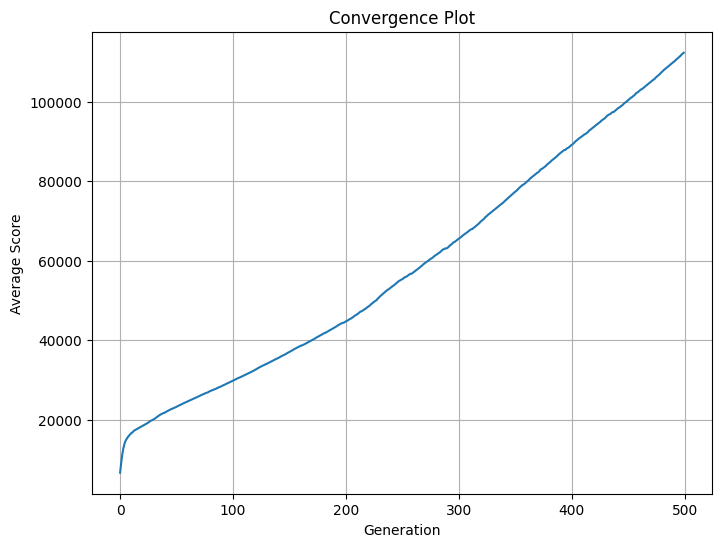

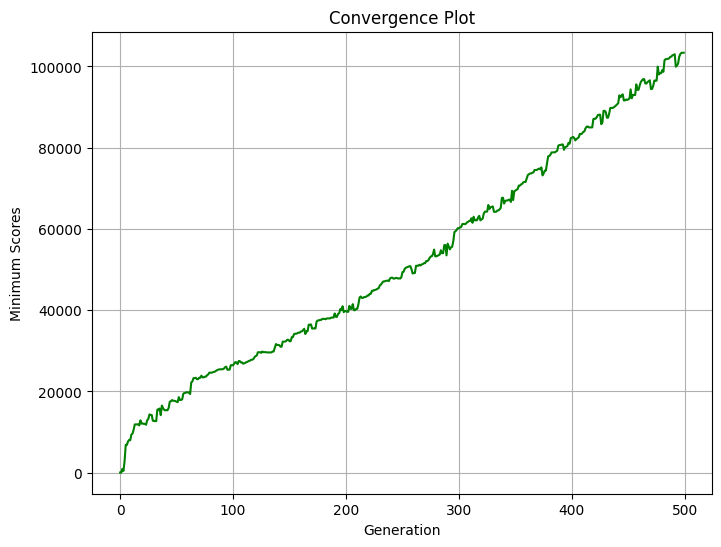

In [13]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-12


In [1]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [2]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [3]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [4]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [5]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [6]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [7]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [8]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [9]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:10] |******************************************** | (494) 

best chromosome:  [-101.13956984  109.42125264]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.001
best score stanard deviation:  0.01
worst score accuracy:  0.003
worst score standard deviation:  0.013


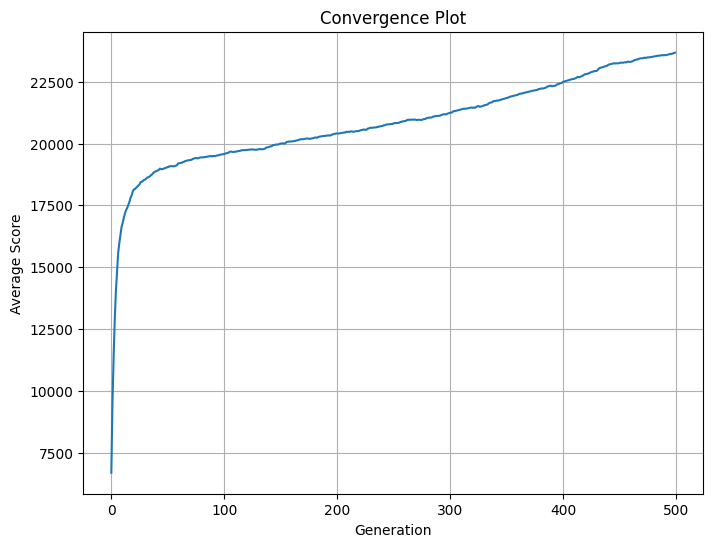

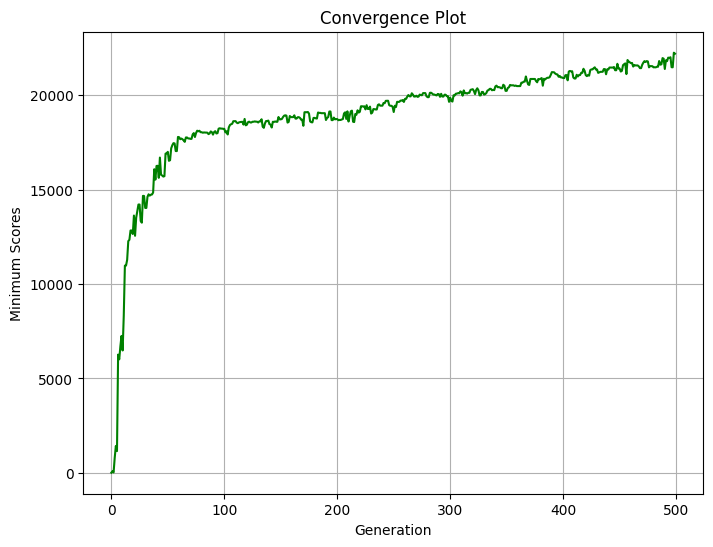

In [10]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-13



In [11]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [12]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [13]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [14]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [15]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [16]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [17]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/4)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [18]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [19]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [20]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:59] |******************************************** | (499) 

best chromosome:  [88.00930183 76.60384991]
average score  accuracy:  0.001
average score standard deviation:  0.002
best score accuracy:  0.028
best score stanard deviation:  0.319
worst score accuracy:  0.0
worst score standard deviation:  0.001


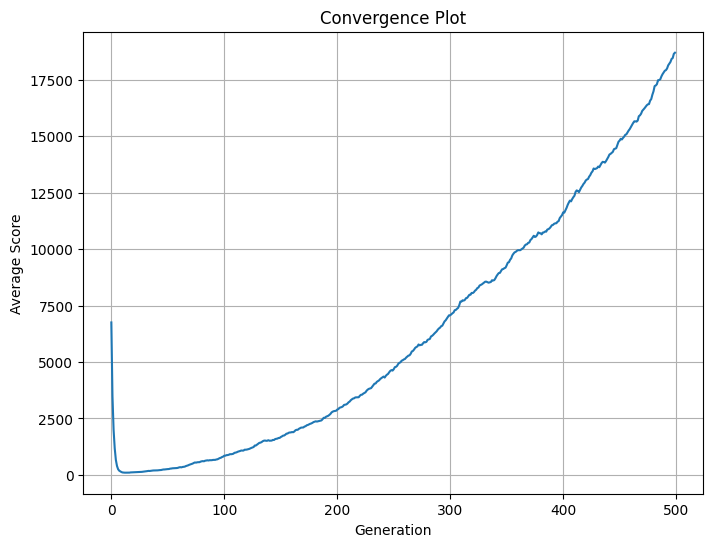

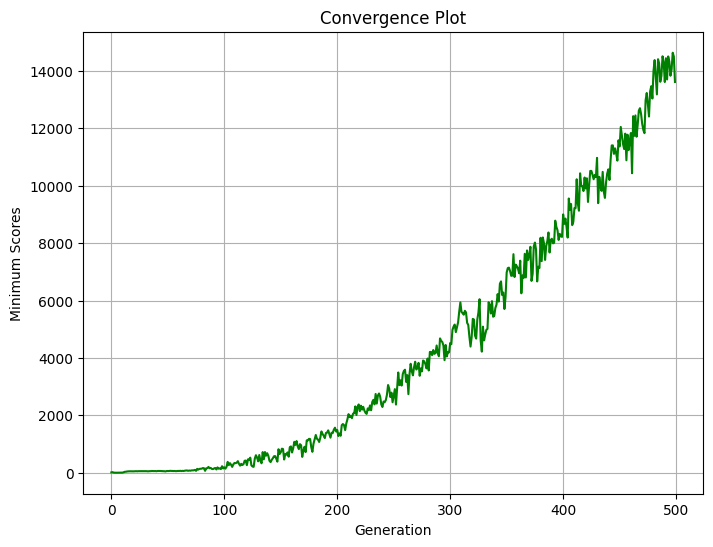

In [22]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-14



In [76]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [77]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=[[-14, 10], [15, 7], [18, 0], [-20, 17], [14, -1], [8, -18], [-17, -20], [-9, 14], [20, 13], [-16, -13], [-6, -6], [12, -20], [20, -11], [2, -12], [14, 2], [14, 5], [-12, 14], [-19, 15], [7, 1], [18, 6], [3, 12], [16, -5], [6, -4], [10, -12], [12, 11], [11, -14], [18, 12], [-12, 5], [-18, -18], [1, -18], [-2, -19], [4, 10], [19, 3], [10, 4], [15, 11], [19, 5], [-4, -20], [-20, -5], [16, 8], [17, 15], [5, 10], [4, -5], [19, -1], [15, 11], [6, 16], [12, 5], [-15, 14], [-1, 6], [14, 1], [-11, 5], [-7, 2], [1, -3], [-2, 16], [-11, 12], [-9, 20], [-12, 14], [12, -4], [-1, 8], [-8, -2], [-10, 16], [7, -20], [6, -14], [1, -18], [-5, 14], [-3, 9], [-12, 4], [19, -9], [16, 10], [-5, 12], [6, -3], [18, 6], [-10, 10], [3, -4], [-12, -14], [19, -8], [1, 18], [-10, -6], [6, -12], [-18, 15], [3, 10], [11, 3], [17, 11], [-8, 12], [18, -12], [11, 1], [-4, -16], [-18, 9], [16, -1], [14, -16], [-13, -13], [-8, 0], [-15, -2], [14, -17], [-15, 8], [0, 18], [-6, 19], [5, -8], [18, -17], [-6, -16], [10, 11], [1, 13], [17, 8], [15, 13], [18, -17], [2, -7], [17, -13], [7, -19], [-20, -14], [-8, -1], [8, 3], [-14, -3], [-1, 11], [-3, -4], [9, -16], [12, 0], [-12, -17], [4, -2], [-1, 9], [-19, 11], [4, -7], [8, -13], [16, -8], [-5, -18], [14, 4], [-4, -8], [-6, 10], [-5, -5], [18, -18], [-9, 20], [8, 16], [-19, -20], [-4, -11], [16, 14], [-11, -4], [-17, 20], [18, -2], [20, 5], [15, -7], [17, -4], [12, 17], [15, 7], [14, 0], [19, 9], [-10, -16], [-5, -16], [0, 6], [0, -14], [-17, -15], [13, 15], [14, 1], [13, -19], [20, 0], [19, -13], [9, 10], [-16, 3], [-5, 0], [9, -6], [13, -18], [4, -11], [13, -7], [19, 19], [4, -15], [-17, 11], [-1, -12], [-8, 12], [2, 12], [6, -5], [-11, -11], [-8, -12], [15, -19], [-16, -15], [-11, -13], [11, 18], [-11, 4], [-7, -16], [15, 14], [-9, 0], [-14, -20], [3, -3], [11, 16], [-4, 19], [11, -3], [-6, -18], [-9, -11], [-12, 18], [-7, 2], [10, 20], [-8, 13], [16, 4], [14, -16], [-19, 16], [-7, -8], [10, 6], [6, 17], [-4, 15], [10, -18], [-17, 11], [19, 2], [2, 14], [-9, 6], [15, -19], [-13, -4], [6, -5], [7, -9], [-17, -1], [11, 7], [17, -7], [20, -5], [18, 16], [-13, -20], [-19, -7], [6, 2], [10, -9], [9, -18], [3, -2], [-10, 15], [-20, -5], [10, 17], [7, 20], [9, -11], [19, -19], [-10, 18], [-15, -17], [-8, 2], [15, 20], [-5, 11], [-3, -19], [-2, -2], [-19, 15], [18, 15], [-7, -13], [15, -12], [2, 2], [20, -18], [10, 0], [-7, -10], [18, -17], [10, -14], [9, -4], [0, -1], [-13, -17], [1, -19], [17, 16], [1, 9], [-20, 0], [-19, -20], [-8, -10], [-2, 18], [-11, 0], [-17, -11], [9, -8], [-11, -6], [3, -11], [-4, 3], [-6, 7], [-20, -12], [7, -12], [0, 11], [-10, -17], [-18, 19], [-12, 7], [-19, -5], [-1, 5], [-14, 12], [2, 15], [12, 5], [-12, -15], [20, 0], [-20, -11], [13, -10], [-12, -6], [17, 16], [13, -18], [-11, -8], [-15, -20], [18, -9], [-14, -15], [-16, -5], [-11, -15], [-13, 13], [-11, -20], [-1, 11], [10, 11], [15, -6], [-16, 7], [-4, -1], [20, -11], [9, -8], [-8, -9], [-1, -3], [-9, -8], [-14, -6], [19, -3], [20, -20], [15, 2], [18, -19], [-17, 3], [16, -9], [9, 2], [0, -1], [10, -2], [-16, 20], [6, -4], [-10, -6], [-17, 4], [19, 11], [3, 9], [11, 17], [-15, -15], [-6, 18], [-19, 17], [19, 2], [12, 1], [-7, -8], [-16, -3], [15, 18], [-18, -5], [18, 19], [17, 11], [3, 10], [3, -1], [-12, -5], [-2, 17], [-10, -8], [18, -12], [5, 9], [-16, -7], [6, -4], [8, 13], [-16, 11], [9, -8], [-8, 10], [-7, -14], [5, 2], [-18, -17], [12, 3], [2, -2], [8, -4], [-8, 2], [-7, 6], [10, 0], [11, 14], [9, -5], [-6, 7], [-19, 10], [-19, 15], [-4, 1], [15, 3], [7, -14], [-9, 6], [-19, 20], [-7, -16], [-7, 5], [-10, -7], [17, 0], [20, -17], [-2, 16], [-7, 4], [-7, -18], [-2, 13], [-9, -8], [3, -11], [20, -15], [16, -19], [-6, -18], [6, 17], [10, 11], [11, -4], [-11, 14], [19, 18], [12, 0], [-1, -12], [-5, -7], [-5, -17], [-10, -6], [-1, 3], [15, -15], [0, 2], [-1, -11], [-19, 9], [10, -14], [-20, 3], [4, -10], [-5, 20], [-1, 6], [6, 1], [11, 5], [-6, 8], [3, 18], [4, 13], [2, 13], [7, -11], [11, 2], [-2, 0], [-18, 15], [-4, -5], [-15, -10], [20, -19], [-10, -8], [-11, 13], [2, 20], [12, -16], [-10, 14], [-3, 12], [-3, -19], [-9, 13], [-3, -11], [4, 3], [2, 9], [9, 17], [-10, 6], [18, -16], [-10, 14], [-11, 7], [-12, -16], [-12, -16], [10, -2], [9, 2], [6, -17], [-16, -6], [0, 2], [-7, -3], [0, -9], [-16, -9], [8, 6], [-12, -3], [14, -1], [-17, 5], [18, 18], [-8, 3], [-10, -2], [6, 11], [0, -1], [-7, -19], [12, -10], [-14, -19], [-13, -12], [-10, -11], [-11, 18], [5, 17], [12, -8], [16, 6], [-12, -13], [2, -9], [5, 14], [10, 0], [-19, -10], [18, -15], [-3, -19], [20, 19], [-10, -12], [20, -14], [3, -12], [-1, -15], [17, -4], [-11, -15], [16, -15], [-20, 6], [-1, 9], [-11, -15], [-9, 15], [-3, -5], [16, -6], [-15, 3], [-13, 9], [8, -12], [15, 18], [11, -6], [9, 16], [3, -2], [11, 16], [4, -13], [-11, 9], [-13, -8], [-3, -2], [0, 19], [12, 5], [-8, 4], [19, 6], [-6, -3], [-8, 4], [-20, 0], [-15, -11], [-1, 9], [-6, -12], [-3, 15], [14, 10], [19, -20], [4, 8], [-2, 1], [-7, -10], [-20, 15], [-7, -8], [15, 2], [-8, -5], [-17, 2], [-16, -10], [18, -5], [-3, 10], [-2, 15], [7, 5], [6, 7], [-10, 7], [16, 5], [4, -12], [-6, -8], [5, 14], [12, -11], [0, -8], [-15, -12], [-19, -20], [-17, -16], [-3, -17], [12, -1], [-16, 13], [3, -11], [19, 7], [19, 18], [-6, -15], [-6, -9], [16, -9], [-8, 20], [11, -6], [-9, -16], [-4, 11], [-6, 12], [-7, -6], [9, 5], [-18, 11], [16, 15], [-18, -13], [-5, -14], [17, 0], [15, 20], [4, 0], [16, 6], [-13, 9], [-7, 3], [7, 7], [18, 3], [18, -18], [-10, 11], [-11, 3], [8, 16], [6, 8], [-11, -3], [5, -8], [14, 11], [-4, -3], [-5, 19], [-3, 13], [-13, -8], [1, -18], [-16, 14], [9, -17], [10, -16], [-10, -19], [-12, 7], [-20, 0], [-1, -15], [11, 2], [4, 2], [-18, 15], [20, 16], [9, -17], [6, -11], [10, -3], [-4, -17], [-4, 5], [20, 1], [13, -12], [11, 14], [-15, 6], [12, 0], [20, 17], [20, -4], [8, 14], [11, 7], [1, -19], [12, 17], [-13, -11], [2, -2], [10, 8], [20, 7], [20, 6], [-7, 14], [-6, 5], [2, -20], [2, 10], [-16, -1], [11, 16], [-6, -10], [18, -14], [17, 9], [-17, 15], [10, 20], [18, -19], [7, 14], [-9, 2], [-8, -4], [-7, -7], [10, 18], [-4, 20], [-15, 18], [-8, -10], [-11, -14], [-7, -8], [-14, -20], [1, -17], [-17, -14], [-4, -4], [10, 19], [16, 9], [-7, -17], [16, 13], [18, 11], [-11, -16], [-15, -15], [-16, 0], [19, -4], [-19, 1], [-2, 16], [16, 7], [12, 10], [-8, 12], [-17, 13], [1, 19], [14, 17], [13, 0], [-15, 2], [-13, 9], [-17, -15], [-4, 19], [-17, 12], [20, -5], [20, -15], [-10, -4], [11, 5], [-9, 18], [-7, 18], [-12, -13], [9, 10], [20, 0], [-1, 17], [5, -20], [-12, -4], [8, 5], [-17, -16], [13, -18], [-7, 14], [-5, -2], [-19, 15], [13, -15], [-2, 18], [7, -11], [20, 8], [12, -20], [13, 0], [-2, 6], [19, -14], [4, 14], [8, 5], [-20, 19], [-13, 2], [2, -16], [17, 2], [-18, 14], [14, 16], [14, 10], [4, -18], [-18, -3], [-15, 8], [-5, -3], [-2, 0], [7, -8], [-15, -17], [-11, 16], [1, 10], [12, -7], [-4, -2], [-14, -18], [7, -4], [19, 20], [14, 17], [-20, -16], [2, 5], [-16, -12], [13, 13], [-4, -18], [1, -20], [10, 12], [1, 19], [13, -16], [12, -8], [4, 2], [16, 17], [12, -17], [-20, 19], [2, -3], [8, -8], [-12, 7], [3, -8], [-11, 2], [1, 7], [5, -19], [8, -6], [5, 11], [20, -8], [12, -17], [-14, -12], [-4, -13], [18, 6], [-4, -4], [5, 18], [1, -7], [18, 17], [-20, 7], [3, 8], [9, 4], [16, 12], [8, -19], [-17, -18], [-16, -13], [-3, -17], [19, -18], [10, 15], [-5, 1], [-12, 0], [-19, -3], [5, -18], [-18, -7], [-7, 6], [6, 13], [-1, 6], [-11, 4], [-7, -17], [19, -8], [-1, 12], [13, 11], [-15, 18], [15, 4], [-9, -10], [6, -1], [-2, -11], [12, -15], [18, 17], [4, 15], [11, 19], [6, 10], [17, 15], [4, 3], [-2, -12], [3, 1], [10, -12], [14, -4], [1, 12], [-5, 20], [2, 7], [-18, 14], [-8, 15], [-19, 6], [-10, -3], [2, 11], [-11, -1], [18, 1], [-6, 2], [-10, 17], [-4, 15], [-5, -14], [-18, -14], [-9, 11], [13, 5], [-10, -19], [15, 8], [-18, -17], [-11, -16], [-1, -16], [-12, 16], [-10, -10], [12, 17], [-11, 7], [-18, -2], [15, -7], [-20, 1], [10, 5], [-10, -8], [1, 4], [15, 5], [9, -12], [20, -18], [9, 4], [15, 16], [-18, -1], [1, 19], [-12, -20], [-11, -6], [-14, -5], [-15, -5], [-3, -6], [14, 16], [10, 16], [-14, -13], [-3, 16], [-4, -8], [1, -10], [2, -3], [0, 7], [12, -14], [-14, 1], [1, -3], [-2, -5], [13, 5], [-18, 4], [-20, 0], [-14, 3], [-14, 1], [7, -1], [-6, -4], [1, -10], [-4, 3], [13, 7], [-19, 18], [7, 20], [-5, 11], [-16, -15], [-10, 6], [-7, 12], [14, -7], [-11, -12], [6, -10], [2, -18], [-12, 15], [1, -14], [19, -11], [-17, -19], [9, 1], [-6, 2], [-11, 0], [4, -16], [-6, -11], [-17, 16], [-9, -12], [-14, -19], [14, 16], [1, -19], [2, -5], [18, -20], [13, -8], [-4, 8], [9, 17], [-18, -19], [-19, 6], [1, 20], [9, 12], [7, 1], [-17, -13], [-17, 20], [-7, 7], [-14, 14], [-13, -7], [9, 15], [14, -18], [4, 14], [-3, 3], [-20, -18], [12, -15], [-16, -4], [-10, 6], [-15, -13], [-5, 15], [19, -8], [-4, -14], [13, 4], [-6, -16], [5, -1], [8, 19], [-11, -10], [17, -18], [-17, -8], [-19, 19], [-10, 3], [-18, 15], [10, -14], [-15, 20], [20, -18], [17, 14], [-3, -20], [3, -5], [-19, -10], [0, -12], [-6, 11], [11, -1], [-8, 13], [-4, 3], [17, -7], [6, 7], [1, -10], [-9, 10], [8, -3], [-9, -4], [-14, -9], [17, 20], [-8, -13], [18, -20], [3, -5], [2, -8], [-12, 3], [1, 3], [10, -17], [-4, 4], [-11, 14], [-16, -8], [2, 13], [0, 2], [-19, 4], [9, -10], [-5, 10], [18, 14], [10, -4], [19, 3], [-16, -8], [-16, 2], [-12, -13], [-5, 8], [9, 18], [-19, 2], [-8, -17], [-13, -8], [15, -9], [-19, 1], [8, 5], [-1, 5], [14, -19], [14, 13], [19, -11], [-12, -18], [4, -5], [6, -2], [6, 6], [14, 13], [3, 3], [18, 2], [8, -19], [7, 16], [12, -14], [3, -12], [1, -14], [8, 4], [2, 5], [14, 11], [-11, -15], [1, -3], [-2, -20], [11, 18], [-1, 6], [-13, 4], [8, -1], [-11, 0], [-7, -9], [1, 16], [18, 9], [8, 20], [7, -7], [-19, -8], [15, -12], [-13, -5], [-17, 1], [7, -16], [11, 8], [-13, -7], [-4, 18], [3, 15], [5, -15], [17, 1], [-13, 17], [-14, 7], [-16, -11], [-1, -8], [12, -7], [4, -17], [9, 1], [7, 7], [1, 5], [20, -16], [-18, -12], [5, -1], [3, -3], [-10, 14], [17, -7], [11, 8], [-10, -4], [-15, -16], [8, 14], [10, 1], [14, -9], [18, -7], [-13, 4], [11, 8], [7, 14], [-6, 17]]
  k_means_pp=KMeans(n_clusters=int(1000/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [78]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [79]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [80]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [81]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [82]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/4)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [83]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [84]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [85]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:35] |******************************************** | (499) 

best chromosome:  [0.04514064 0.11080301]
average score  accuracy:  0.045
average score standard deviation:  0.013
best score accuracy:  1.019
best score stanard deviation:  0.154
worst score accuracy:  0.004
worst score standard deviation:  0.001


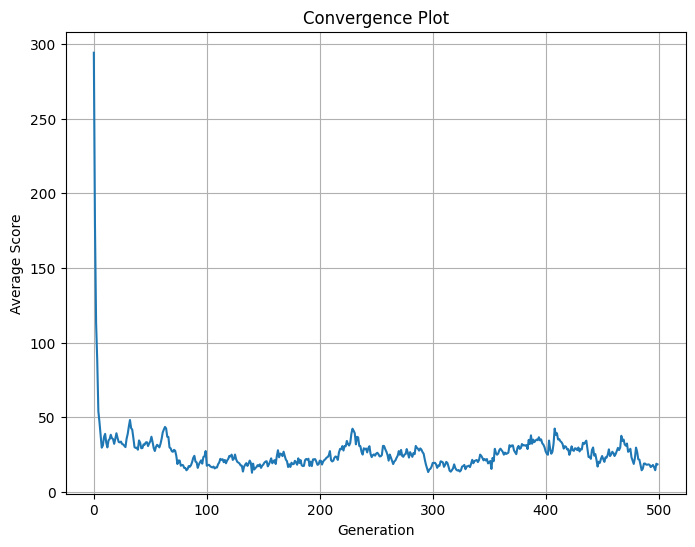

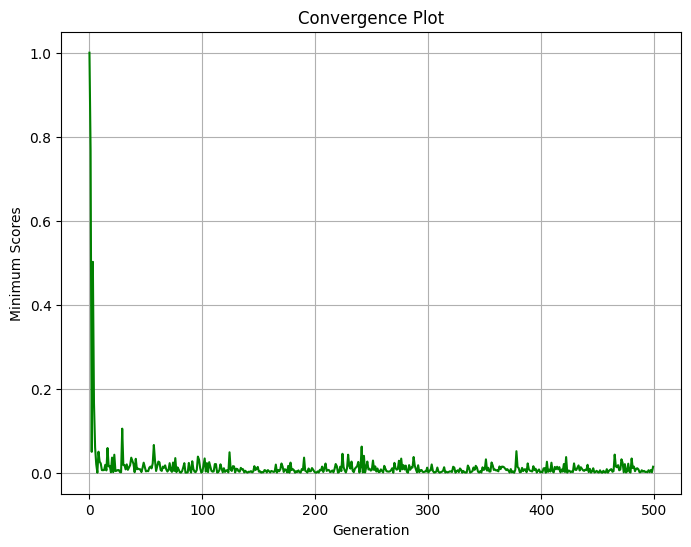

In [86]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,1)
    best_accuracy,bst_std=average_fraction(stats_min,1)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,1)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-15



In [1]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [2]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [3]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [4]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [5]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [6]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [7]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [8]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [9]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [10]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:01:07] |******************************************** | (498) 

best chromosome:  [73.40798822 80.33463396]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.006
best score stanard deviation:  0.014
worst score accuracy:  0.001
worst score standard deviation:  0.003


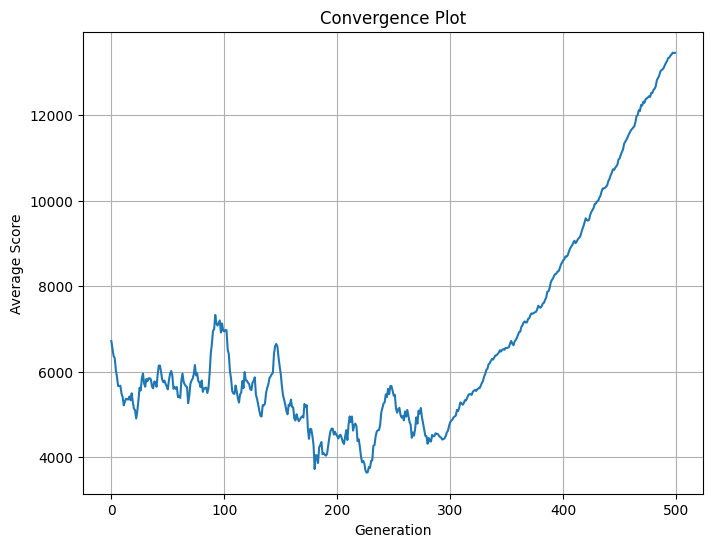

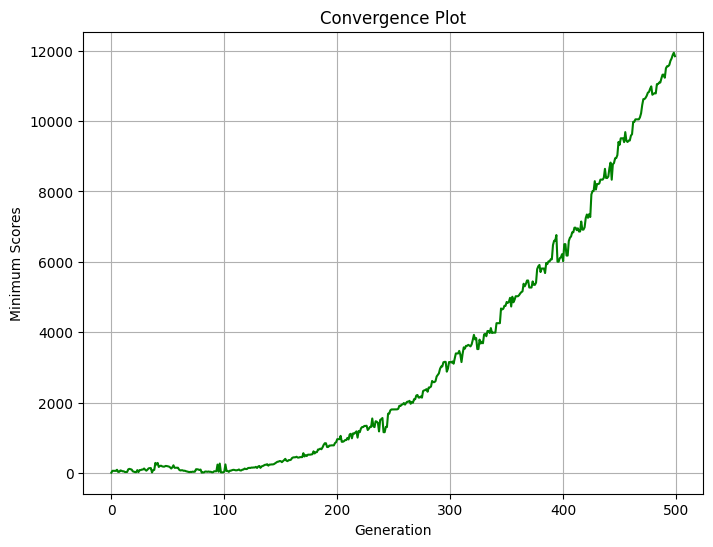

In [11]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-16



In [39]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [40]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=[[-14, 10], [15, 7], [18, 0], [-20, 17], [14, -1], [8, -18], [-17, -20], [-9, 14], [20, 13], [-16, -13], [-6, -6], [12, -20], [20, -11], [2, -12], [14, 2], [14, 5], [-12, 14], [-19, 15], [7, 1], [18, 6], [3, 12], [16, -5], [6, -4], [10, -12], [12, 11], [11, -14], [18, 12], [-12, 5], [-18, -18], [1, -18], [-2, -19], [4, 10], [19, 3], [10, 4], [15, 11], [19, 5], [-4, -20], [-20, -5], [16, 8], [17, 15], [5, 10], [4, -5], [19, -1], [15, 11], [6, 16], [12, 5], [-15, 14], [-1, 6], [14, 1], [-11, 5], [-7, 2], [1, -3], [-2, 16], [-11, 12], [-9, 20], [-12, 14], [12, -4], [-1, 8], [-8, -2], [-10, 16], [7, -20], [6, -14], [1, -18], [-5, 14], [-3, 9], [-12, 4], [19, -9], [16, 10], [-5, 12], [6, -3], [18, 6], [-10, 10], [3, -4], [-12, -14], [19, -8], [1, 18], [-10, -6], [6, -12], [-18, 15], [3, 10], [11, 3], [17, 11], [-8, 12], [18, -12], [11, 1], [-4, -16], [-18, 9], [16, -1], [14, -16], [-13, -13], [-8, 0], [-15, -2], [14, -17], [-15, 8], [0, 18], [-6, 19], [5, -8], [18, -17], [-6, -16], [10, 11], [1, 13], [17, 8], [15, 13], [18, -17], [2, -7], [17, -13], [7, -19], [-20, -14], [-8, -1], [8, 3], [-14, -3], [-1, 11], [-3, -4], [9, -16], [12, 0], [-12, -17], [4, -2], [-1, 9], [-19, 11], [4, -7], [8, -13], [16, -8], [-5, -18], [14, 4], [-4, -8], [-6, 10], [-5, -5], [18, -18], [-9, 20], [8, 16], [-19, -20], [-4, -11], [16, 14], [-11, -4], [-17, 20], [18, -2], [20, 5], [15, -7], [17, -4], [12, 17], [15, 7], [14, 0], [19, 9], [-10, -16], [-5, -16], [0, 6], [0, -14], [-17, -15], [13, 15], [14, 1], [13, -19], [20, 0], [19, -13], [9, 10], [-16, 3], [-5, 0], [9, -6], [13, -18], [4, -11], [13, -7], [19, 19], [4, -15], [-17, 11], [-1, -12], [-8, 12], [2, 12], [6, -5], [-11, -11], [-8, -12], [15, -19], [-16, -15], [-11, -13], [11, 18], [-11, 4], [-7, -16], [15, 14], [-9, 0], [-14, -20], [3, -3], [11, 16], [-4, 19], [11, -3], [-6, -18], [-9, -11], [-12, 18], [-7, 2], [10, 20], [-8, 13], [16, 4], [14, -16], [-19, 16], [-7, -8], [10, 6], [6, 17], [-4, 15], [10, -18], [-17, 11], [19, 2], [2, 14], [-9, 6], [15, -19], [-13, -4], [6, -5], [7, -9], [-17, -1], [11, 7], [17, -7], [20, -5], [18, 16], [-13, -20], [-19, -7], [6, 2], [10, -9], [9, -18], [3, -2], [-10, 15], [-20, -5], [10, 17], [7, 20], [9, -11], [19, -19], [-10, 18], [-15, -17], [-8, 2], [15, 20], [-5, 11], [-3, -19], [-2, -2], [-19, 15], [18, 15], [-7, -13], [15, -12], [2, 2], [20, -18], [10, 0], [-7, -10], [18, -17], [10, -14], [9, -4], [0, -1], [-13, -17], [1, -19], [17, 16], [1, 9], [-20, 0], [-19, -20], [-8, -10], [-2, 18], [-11, 0], [-17, -11], [9, -8], [-11, -6], [3, -11], [-4, 3], [-6, 7], [-20, -12], [7, -12], [0, 11], [-10, -17], [-18, 19], [-12, 7], [-19, -5], [-1, 5], [-14, 12], [2, 15], [12, 5], [-12, -15], [20, 0], [-20, -11], [13, -10], [-12, -6], [17, 16], [13, -18], [-11, -8], [-15, -20], [18, -9], [-14, -15], [-16, -5], [-11, -15], [-13, 13], [-11, -20], [-1, 11], [10, 11], [15, -6], [-16, 7], [-4, -1], [20, -11], [9, -8], [-8, -9], [-1, -3], [-9, -8], [-14, -6], [19, -3], [20, -20], [15, 2], [18, -19], [-17, 3], [16, -9], [9, 2], [0, -1], [10, -2], [-16, 20], [6, -4], [-10, -6], [-17, 4], [19, 11], [3, 9], [11, 17], [-15, -15], [-6, 18], [-19, 17], [19, 2], [12, 1], [-7, -8], [-16, -3], [15, 18], [-18, -5], [18, 19], [17, 11], [3, 10], [3, -1], [-12, -5], [-2, 17], [-10, -8], [18, -12], [5, 9], [-16, -7], [6, -4], [8, 13], [-16, 11], [9, -8], [-8, 10], [-7, -14], [5, 2], [-18, -17], [12, 3], [2, -2], [8, -4], [-8, 2], [-7, 6], [10, 0], [11, 14], [9, -5], [-6, 7], [-19, 10], [-19, 15], [-4, 1], [15, 3], [7, -14], [-9, 6], [-19, 20], [-7, -16], [-7, 5], [-10, -7], [17, 0], [20, -17], [-2, 16], [-7, 4], [-7, -18], [-2, 13], [-9, -8], [3, -11], [20, -15], [16, -19], [-6, -18], [6, 17], [10, 11], [11, -4], [-11, 14], [19, 18], [12, 0], [-1, -12], [-5, -7], [-5, -17], [-10, -6], [-1, 3], [15, -15], [0, 2], [-1, -11], [-19, 9], [10, -14], [-20, 3], [4, -10], [-5, 20], [-1, 6], [6, 1], [11, 5], [-6, 8], [3, 18], [4, 13], [2, 13], [7, -11], [11, 2], [-2, 0], [-18, 15], [-4, -5], [-15, -10], [20, -19], [-10, -8], [-11, 13], [2, 20], [12, -16], [-10, 14], [-3, 12], [-3, -19], [-9, 13], [-3, -11], [4, 3], [2, 9], [9, 17], [-10, 6], [18, -16], [-10, 14], [-11, 7], [-12, -16], [-12, -16], [10, -2], [9, 2], [6, -17], [-16, -6], [0, 2], [-7, -3], [0, -9], [-16, -9], [8, 6], [-12, -3], [14, -1], [-17, 5], [18, 18], [-8, 3], [-10, -2], [6, 11], [0, -1], [-7, -19], [12, -10], [-14, -19], [-13, -12], [-10, -11], [-11, 18], [5, 17], [12, -8], [16, 6], [-12, -13], [2, -9], [5, 14], [10, 0], [-19, -10], [18, -15], [-3, -19], [20, 19], [-10, -12], [20, -14], [3, -12], [-1, -15], [17, -4], [-11, -15], [16, -15], [-20, 6], [-1, 9], [-11, -15], [-9, 15], [-3, -5], [16, -6], [-15, 3], [-13, 9], [8, -12], [15, 18], [11, -6], [9, 16], [3, -2], [11, 16], [4, -13], [-11, 9], [-13, -8], [-3, -2], [0, 19], [12, 5], [-8, 4], [19, 6], [-6, -3], [-8, 4], [-20, 0], [-15, -11], [-1, 9], [-6, -12], [-3, 15], [14, 10], [19, -20], [4, 8], [-2, 1], [-7, -10], [-20, 15], [-7, -8], [15, 2], [-8, -5], [-17, 2], [-16, -10], [18, -5], [-3, 10], [-2, 15], [7, 5], [6, 7], [-10, 7], [16, 5], [4, -12], [-6, -8], [5, 14], [12, -11], [0, -8], [-15, -12], [-19, -20], [-17, -16], [-3, -17], [12, -1], [-16, 13], [3, -11], [19, 7], [19, 18], [-6, -15], [-6, -9], [16, -9], [-8, 20], [11, -6], [-9, -16], [-4, 11], [-6, 12], [-7, -6], [9, 5], [-18, 11], [16, 15], [-18, -13], [-5, -14], [17, 0], [15, 20], [4, 0], [16, 6], [-13, 9], [-7, 3], [7, 7], [18, 3], [18, -18], [-10, 11], [-11, 3], [8, 16], [6, 8], [-11, -3], [5, -8], [14, 11], [-4, -3], [-5, 19], [-3, 13], [-13, -8], [1, -18], [-16, 14], [9, -17], [10, -16], [-10, -19], [-12, 7], [-20, 0], [-1, -15], [11, 2], [4, 2], [-18, 15], [20, 16], [9, -17], [6, -11], [10, -3], [-4, -17], [-4, 5], [20, 1], [13, -12], [11, 14], [-15, 6], [12, 0], [20, 17], [20, -4], [8, 14], [11, 7], [1, -19], [12, 17], [-13, -11], [2, -2], [10, 8], [20, 7], [20, 6], [-7, 14], [-6, 5], [2, -20], [2, 10], [-16, -1], [11, 16], [-6, -10], [18, -14], [17, 9], [-17, 15], [10, 20], [18, -19], [7, 14], [-9, 2], [-8, -4], [-7, -7], [10, 18], [-4, 20], [-15, 18], [-8, -10], [-11, -14], [-7, -8], [-14, -20], [1, -17], [-17, -14], [-4, -4], [10, 19], [16, 9], [-7, -17], [16, 13], [18, 11], [-11, -16], [-15, -15], [-16, 0], [19, -4], [-19, 1], [-2, 16], [16, 7], [12, 10], [-8, 12], [-17, 13], [1, 19], [14, 17], [13, 0], [-15, 2], [-13, 9], [-17, -15], [-4, 19], [-17, 12], [20, -5], [20, -15], [-10, -4], [11, 5], [-9, 18], [-7, 18], [-12, -13], [9, 10], [20, 0], [-1, 17], [5, -20], [-12, -4], [8, 5], [-17, -16], [13, -18], [-7, 14], [-5, -2], [-19, 15], [13, -15], [-2, 18], [7, -11], [20, 8], [12, -20], [13, 0], [-2, 6], [19, -14], [4, 14], [8, 5], [-20, 19], [-13, 2], [2, -16], [17, 2], [-18, 14], [14, 16], [14, 10], [4, -18], [-18, -3], [-15, 8], [-5, -3], [-2, 0], [7, -8], [-15, -17], [-11, 16], [1, 10], [12, -7], [-4, -2], [-14, -18], [7, -4], [19, 20], [14, 17], [-20, -16], [2, 5], [-16, -12], [13, 13], [-4, -18], [1, -20], [10, 12], [1, 19], [13, -16], [12, -8], [4, 2], [16, 17], [12, -17], [-20, 19], [2, -3], [8, -8], [-12, 7], [3, -8], [-11, 2], [1, 7], [5, -19], [8, -6], [5, 11], [20, -8], [12, -17], [-14, -12], [-4, -13], [18, 6], [-4, -4], [5, 18], [1, -7], [18, 17], [-20, 7], [3, 8], [9, 4], [16, 12], [8, -19], [-17, -18], [-16, -13], [-3, -17], [19, -18], [10, 15], [-5, 1], [-12, 0], [-19, -3], [5, -18], [-18, -7], [-7, 6], [6, 13], [-1, 6], [-11, 4], [-7, -17], [19, -8], [-1, 12], [13, 11], [-15, 18], [15, 4], [-9, -10], [6, -1], [-2, -11], [12, -15], [18, 17], [4, 15], [11, 19], [6, 10], [17, 15], [4, 3], [-2, -12], [3, 1], [10, -12], [14, -4], [1, 12], [-5, 20], [2, 7], [-18, 14], [-8, 15], [-19, 6], [-10, -3], [2, 11], [-11, -1], [18, 1], [-6, 2], [-10, 17], [-4, 15], [-5, -14], [-18, -14], [-9, 11], [13, 5], [-10, -19], [15, 8], [-18, -17], [-11, -16], [-1, -16], [-12, 16], [-10, -10], [12, 17], [-11, 7], [-18, -2], [15, -7], [-20, 1], [10, 5], [-10, -8], [1, 4], [15, 5], [9, -12], [20, -18], [9, 4], [15, 16], [-18, -1], [1, 19], [-12, -20], [-11, -6], [-14, -5], [-15, -5], [-3, -6], [14, 16], [10, 16], [-14, -13], [-3, 16], [-4, -8], [1, -10], [2, -3], [0, 7], [12, -14], [-14, 1], [1, -3], [-2, -5], [13, 5], [-18, 4], [-20, 0], [-14, 3], [-14, 1], [7, -1], [-6, -4], [1, -10], [-4, 3], [13, 7], [-19, 18], [7, 20], [-5, 11], [-16, -15], [-10, 6], [-7, 12], [14, -7], [-11, -12], [6, -10], [2, -18], [-12, 15], [1, -14], [19, -11], [-17, -19], [9, 1], [-6, 2], [-11, 0], [4, -16], [-6, -11], [-17, 16], [-9, -12], [-14, -19], [14, 16], [1, -19], [2, -5], [18, -20], [13, -8], [-4, 8], [9, 17], [-18, -19], [-19, 6], [1, 20], [9, 12], [7, 1], [-17, -13], [-17, 20], [-7, 7], [-14, 14], [-13, -7], [9, 15], [14, -18], [4, 14], [-3, 3], [-20, -18], [12, -15], [-16, -4], [-10, 6], [-15, -13], [-5, 15], [19, -8], [-4, -14], [13, 4], [-6, -16], [5, -1], [8, 19], [-11, -10], [17, -18], [-17, -8], [-19, 19], [-10, 3], [-18, 15], [10, -14], [-15, 20], [20, -18], [17, 14], [-3, -20], [3, -5], [-19, -10], [0, -12], [-6, 11], [11, -1], [-8, 13], [-4, 3], [17, -7], [6, 7], [1, -10], [-9, 10], [8, -3], [-9, -4], [-14, -9], [17, 20], [-8, -13], [18, -20], [3, -5], [2, -8], [-12, 3], [1, 3], [10, -17], [-4, 4], [-11, 14], [-16, -8], [2, 13], [0, 2], [-19, 4], [9, -10], [-5, 10], [18, 14], [10, -4], [19, 3], [-16, -8], [-16, 2], [-12, -13], [-5, 8], [9, 18], [-19, 2], [-8, -17], [-13, -8], [15, -9], [-19, 1], [8, 5], [-1, 5], [14, -19], [14, 13], [19, -11], [-12, -18], [4, -5], [6, -2], [6, 6], [14, 13], [3, 3], [18, 2], [8, -19], [7, 16], [12, -14], [3, -12], [1, -14], [8, 4], [2, 5], [14, 11], [-11, -15], [1, -3], [-2, -20], [11, 18], [-1, 6], [-13, 4], [8, -1], [-11, 0], [-7, -9], [1, 16], [18, 9], [8, 20], [7, -7], [-19, -8], [15, -12], [-13, -5], [-17, 1], [7, -16], [11, 8], [-13, -7], [-4, 18], [3, 15], [5, -15], [17, 1], [-13, 17], [-14, 7], [-16, -11], [-1, -8], [12, -7], [4, -17], [9, 1], [7, 7], [1, 5], [20, -16], [-18, -12], [5, -1], [3, -3], [-10, 14], [17, -7], [11, 8], [-10, -4], [-15, -16], [8, 14], [10, 1], [14, -9], [18, -7], [-13, 4], [11, 8], [7, 14], [-6, 17]]
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [41]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [42]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [43]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [44]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [45]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [46]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [47]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [48]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:54] |******************************************** | (498) 

best chromosome:  [ 0.08922732 -0.01435559]
average score  accuracy:  0.065
average score standard deviation:  0.064
best score accuracy:  2.124
best score stanard deviation:  4.46
worst score accuracy:  0.014
worst score standard deviation:  0.015


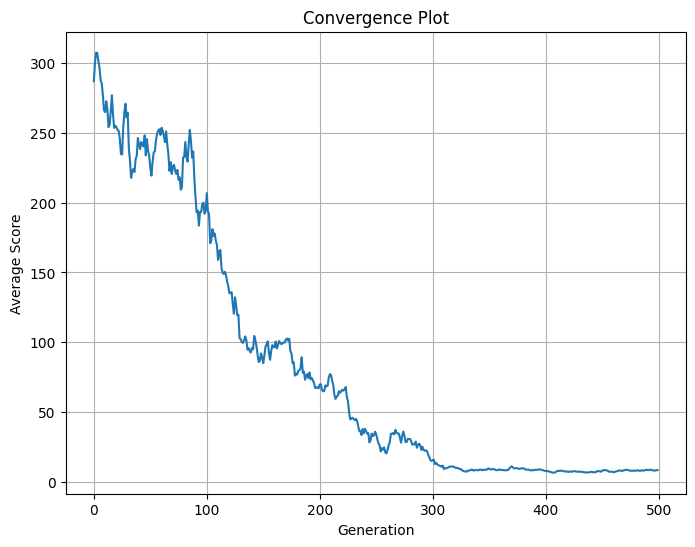

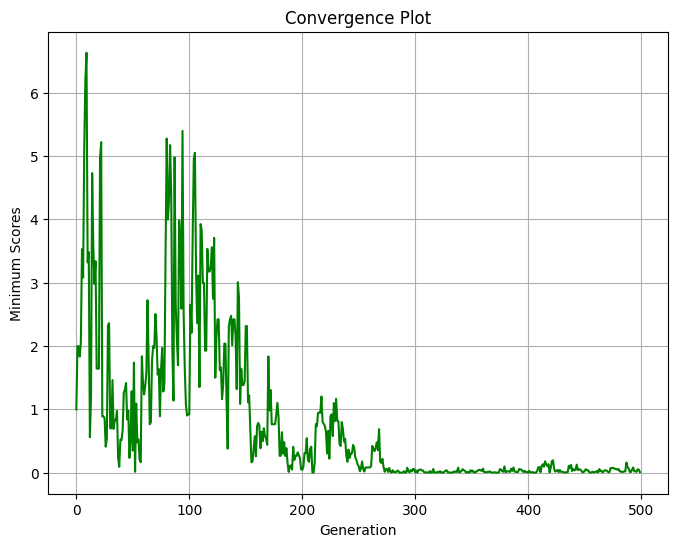

In [50]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,1)
    best_accuracy,bst_std=average_fraction(stats_min,1)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,1)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-18


In [1]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [2]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [3]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [4]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    # print("selected individuals: ",len(selected_indiviuals_list),"\n")
    return selected_indiviuals_list



In [5]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [6]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [7]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [8]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)
    # print(delta_fitness)

    # Check if the difference is smaller than a small threshold
    if delta_fitness>=0 and delta_fitness<=2:
      return True
    else:
      return False

In [9]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [10]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:01:01] |******************************************** | (498) 

best chromosome:  [ 5.17488688 -6.64761742]
average score  accuracy:  0.006
average score standard deviation:  0.003
best score accuracy:  0.074
best score stanard deviation:  0.923
worst score accuracy:  0.0
worst score standard deviation:  0.0


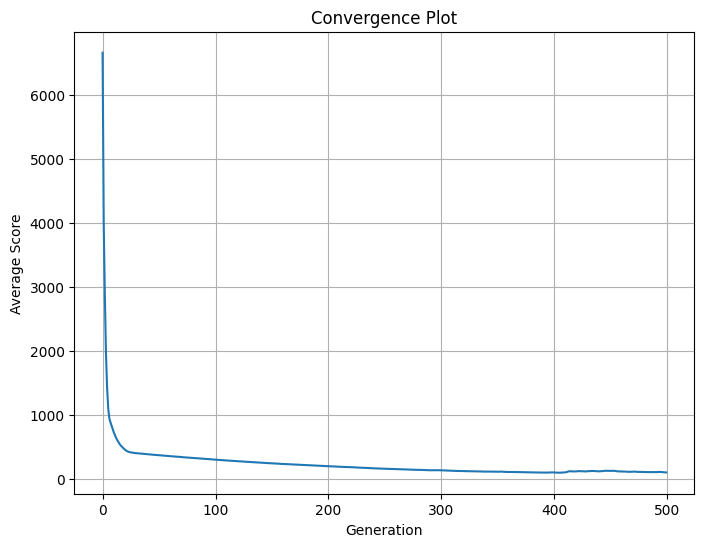

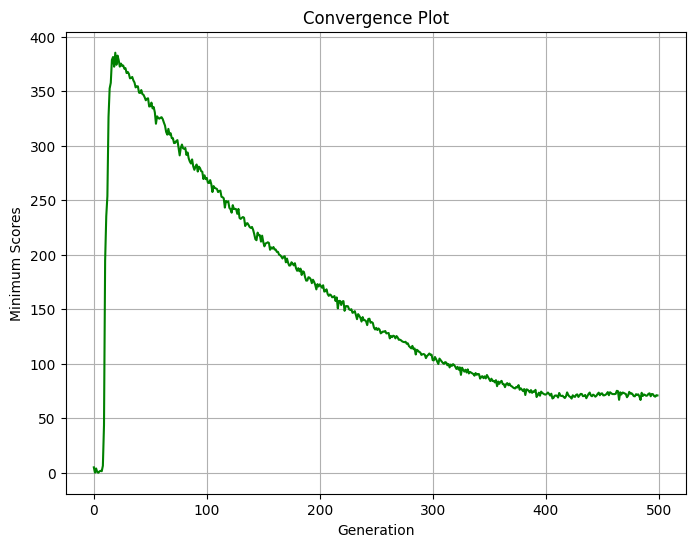

In [11]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-17


In [1]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [2]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [3]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [4]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [5]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [6]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [7]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [8]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)
    # print(delta_fitness)

    # Check if the difference is smaller than a small threshold
    if delta_fitness>=0 and delta_fitness<=2:
      return True
    else:
      return False

In [9]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [10]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:01:17] |******************************************** | (498) 

best chromosome:  [-2.46445469 -0.30881182]
average score  accuracy:  0.004
average score standard deviation:  0.001
best score accuracy:  0.224
best score stanard deviation:  1.025
worst score accuracy:  0.0
worst score standard deviation:  0.0


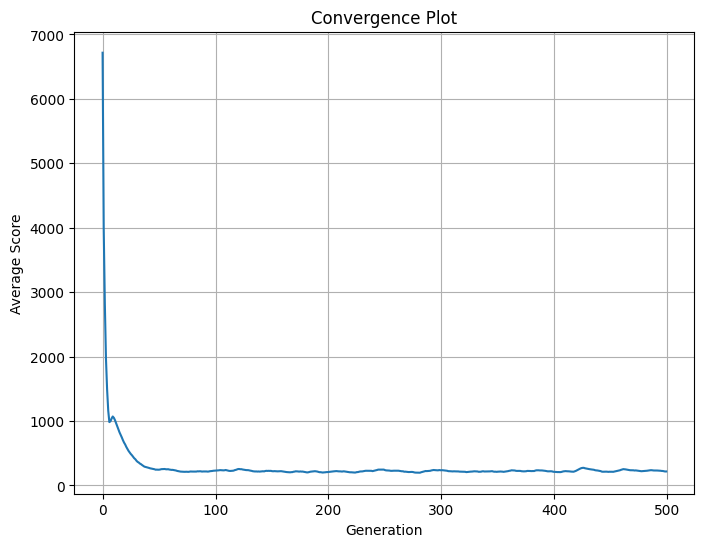

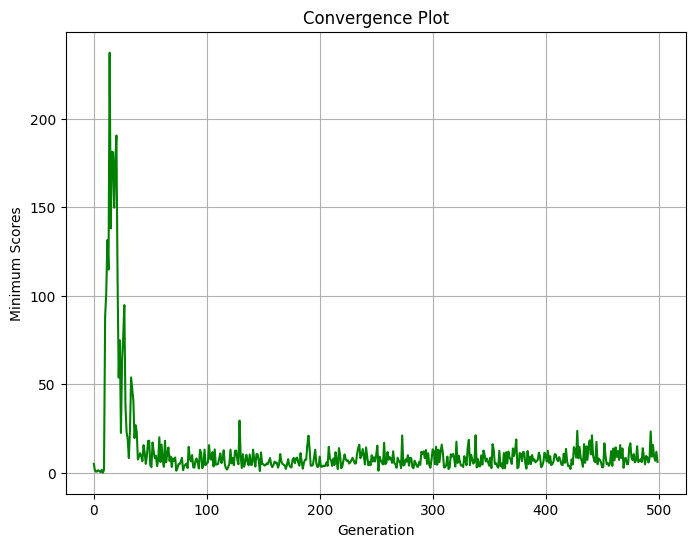

In [11]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-19



In [12]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [13]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [14]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [15]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [16]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [17]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [18]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [19]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)
    # print(delta_fitness)

    # Check if the difference is smaller than a small threshold
    if delta_fitness>=0 and delta_fitness<=2:
      return True
    else:
      return False

In [20]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [21]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:00:38] |******************************************** | (498) 

best chromosome:  [99 98]
average score  accuracy:  0.0
average score standard deviation:  0.0
best score accuracy:  0.001
best score stanard deviation:  0.011
worst score accuracy:  0.0
worst score standard deviation:  0.0


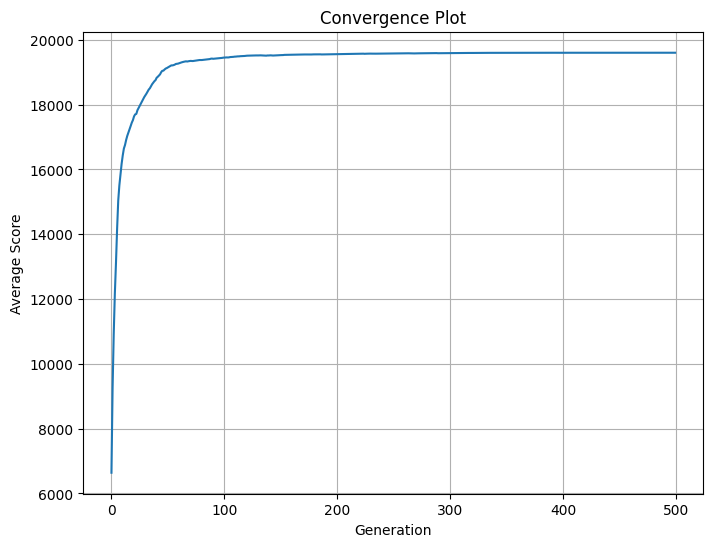

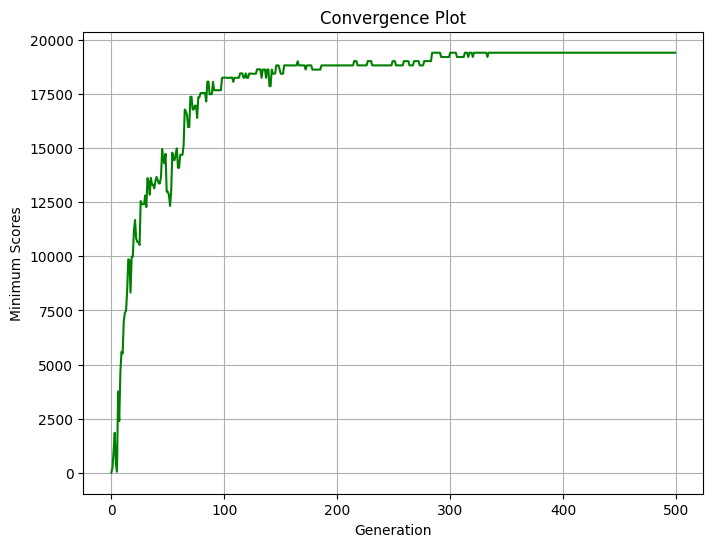

In [22]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,0)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-23



In [17]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [18]:
def initialize(sz,n_feat):
    population=[]
    data=[[-14, 10], [15, 7], [18, 0], [-20, 17], [14, -1], [8, -18], [-17, -20], [-9, 14], [20, 13], [-16, -13], [-6, -6], [12, -20], [20, -11], [2, -12], [14, 2], [14, 5], [-12, 14], [-19, 15], [7, 1], [18, 6], [3, 12], [16, -5], [6, -4], [10, -12], [12, 11], [11, -14], [18, 12], [-12, 5], [-18, -18], [1, -18], [-2, -19], [4, 10], [19, 3], [10, 4], [15, 11], [19, 5], [-4, -20], [-20, -5], [16, 8], [17, 15], [5, 10], [4, -5], [19, -1], [15, 11], [6, 16], [12, 5], [-15, 14], [-1, 6], [14, 1], [-11, 5], [-7, 2], [1, -3], [-2, 16], [-11, 12], [-9, 20], [-12, 14], [12, -4], [-1, 8], [-8, -2], [-10, 16], [7, -20], [6, -14], [1, -18], [-5, 14], [-3, 9], [-12, 4], [19, -9], [16, 10], [-5, 12], [6, -3], [18, 6], [-10, 10], [3, -4], [-12, -14], [19, -8], [1, 18], [-10, -6], [6, -12], [-18, 15], [3, 10], [11, 3], [17, 11], [-8, 12], [18, -12], [11, 1], [-4, -16], [-18, 9], [16, -1], [14, -16], [-13, -13], [-8, 0], [-15, -2], [14, -17], [-15, 8], [0, 18], [-6, 19], [5, -8], [18, -17], [-6, -16], [10, 11], [1, 13], [17, 8], [15, 13], [18, -17], [2, -7], [17, -13], [7, -19], [-20, -14], [-8, -1], [8, 3], [-14, -3], [-1, 11], [-3, -4], [9, -16], [12, 0], [-12, -17], [4, -2], [-1, 9], [-19, 11], [4, -7], [8, -13], [16, -8], [-5, -18], [14, 4], [-4, -8], [-6, 10], [-5, -5], [18, -18], [-9, 20], [8, 16], [-19, -20], [-4, -11], [16, 14], [-11, -4], [-17, 20], [18, -2], [20, 5], [15, -7], [17, -4], [12, 17], [15, 7], [14, 0], [19, 9], [-10, -16], [-5, -16], [0, 6], [0, -14], [-17, -15], [13, 15], [14, 1], [13, -19], [20, 0], [19, -13], [9, 10], [-16, 3], [-5, 0], [9, -6], [13, -18], [4, -11], [13, -7], [19, 19], [4, -15], [-17, 11], [-1, -12], [-8, 12], [2, 12], [6, -5], [-11, -11], [-8, -12], [15, -19], [-16, -15], [-11, -13], [11, 18], [-11, 4], [-7, -16], [15, 14], [-9, 0], [-14, -20], [3, -3], [11, 16], [-4, 19], [11, -3], [-6, -18], [-9, -11], [-12, 18], [-7, 2], [10, 20], [-8, 13], [16, 4], [14, -16], [-19, 16], [-7, -8], [10, 6], [6, 17], [-4, 15], [10, -18], [-17, 11], [19, 2], [2, 14], [-9, 6], [15, -19], [-13, -4], [6, -5], [7, -9], [-17, -1], [11, 7], [17, -7], [20, -5], [18, 16], [-13, -20], [-19, -7], [6, 2], [10, -9], [9, -18], [3, -2], [-10, 15], [-20, -5], [10, 17], [7, 20], [9, -11], [19, -19], [-10, 18], [-15, -17], [-8, 2], [15, 20], [-5, 11], [-3, -19], [-2, -2], [-19, 15], [18, 15], [-7, -13], [15, -12], [2, 2], [20, -18], [10, 0], [-7, -10], [18, -17], [10, -14], [9, -4], [0, -1], [-13, -17], [1, -19], [17, 16], [1, 9], [-20, 0], [-19, -20], [-8, -10], [-2, 18], [-11, 0], [-17, -11], [9, -8], [-11, -6], [3, -11], [-4, 3], [-6, 7], [-20, -12], [7, -12], [0, 11], [-10, -17], [-18, 19], [-12, 7], [-19, -5], [-1, 5], [-14, 12], [2, 15], [12, 5], [-12, -15], [20, 0], [-20, -11], [13, -10], [-12, -6], [17, 16], [13, -18], [-11, -8], [-15, -20], [18, -9], [-14, -15], [-16, -5], [-11, -15], [-13, 13], [-11, -20], [-1, 11], [10, 11], [15, -6], [-16, 7], [-4, -1], [20, -11], [9, -8], [-8, -9], [-1, -3], [-9, -8], [-14, -6], [19, -3], [20, -20], [15, 2], [18, -19], [-17, 3], [16, -9], [9, 2], [0, -1], [10, -2], [-16, 20], [6, -4], [-10, -6], [-17, 4], [19, 11], [3, 9], [11, 17], [-15, -15], [-6, 18], [-19, 17], [19, 2], [12, 1], [-7, -8], [-16, -3], [15, 18], [-18, -5], [18, 19], [17, 11], [3, 10], [3, -1], [-12, -5], [-2, 17], [-10, -8], [18, -12], [5, 9], [-16, -7], [6, -4], [8, 13], [-16, 11], [9, -8], [-8, 10], [-7, -14], [5, 2], [-18, -17], [12, 3], [2, -2], [8, -4], [-8, 2], [-7, 6], [10, 0], [11, 14], [9, -5], [-6, 7], [-19, 10], [-19, 15], [-4, 1], [15, 3], [7, -14], [-9, 6], [-19, 20], [-7, -16], [-7, 5], [-10, -7], [17, 0], [20, -17], [-2, 16], [-7, 4], [-7, -18], [-2, 13], [-9, -8], [3, -11], [20, -15], [16, -19], [-6, -18], [6, 17], [10, 11], [11, -4], [-11, 14], [19, 18], [12, 0], [-1, -12], [-5, -7], [-5, -17], [-10, -6], [-1, 3], [15, -15], [0, 2], [-1, -11], [-19, 9], [10, -14], [-20, 3], [4, -10], [-5, 20], [-1, 6], [6, 1], [11, 5], [-6, 8], [3, 18], [4, 13], [2, 13], [7, -11], [11, 2], [-2, 0], [-18, 15], [-4, -5], [-15, -10], [20, -19], [-10, -8], [-11, 13], [2, 20], [12, -16], [-10, 14], [-3, 12], [-3, -19], [-9, 13], [-3, -11], [4, 3], [2, 9], [9, 17], [-10, 6], [18, -16], [-10, 14], [-11, 7], [-12, -16], [-12, -16], [10, -2], [9, 2], [6, -17], [-16, -6], [0, 2], [-7, -3], [0, -9], [-16, -9], [8, 6], [-12, -3], [14, -1], [-17, 5], [18, 18], [-8, 3], [-10, -2], [6, 11], [0, -1], [-7, -19], [12, -10], [-14, -19], [-13, -12], [-10, -11], [-11, 18], [5, 17], [12, -8], [16, 6], [-12, -13], [2, -9], [5, 14], [10, 0], [-19, -10], [18, -15], [-3, -19], [20, 19], [-10, -12], [20, -14], [3, -12], [-1, -15], [17, -4], [-11, -15], [16, -15], [-20, 6], [-1, 9], [-11, -15], [-9, 15], [-3, -5], [16, -6], [-15, 3], [-13, 9], [8, -12], [15, 18], [11, -6], [9, 16], [3, -2], [11, 16], [4, -13], [-11, 9], [-13, -8], [-3, -2], [0, 19], [12, 5], [-8, 4], [19, 6], [-6, -3], [-8, 4], [-20, 0], [-15, -11], [-1, 9], [-6, -12], [-3, 15], [14, 10], [19, -20], [4, 8], [-2, 1], [-7, -10], [-20, 15], [-7, -8], [15, 2], [-8, -5], [-17, 2], [-16, -10], [18, -5], [-3, 10], [-2, 15], [7, 5], [6, 7], [-10, 7], [16, 5], [4, -12], [-6, -8], [5, 14], [12, -11], [0, -8], [-15, -12], [-19, -20], [-17, -16], [-3, -17], [12, -1], [-16, 13], [3, -11], [19, 7], [19, 18], [-6, -15], [-6, -9], [16, -9], [-8, 20], [11, -6], [-9, -16], [-4, 11], [-6, 12], [-7, -6], [9, 5], [-18, 11], [16, 15], [-18, -13], [-5, -14], [17, 0], [15, 20], [4, 0], [16, 6], [-13, 9], [-7, 3], [7, 7], [18, 3], [18, -18], [-10, 11], [-11, 3], [8, 16], [6, 8], [-11, -3], [5, -8], [14, 11], [-4, -3], [-5, 19], [-3, 13], [-13, -8], [1, -18], [-16, 14], [9, -17], [10, -16], [-10, -19], [-12, 7], [-20, 0], [-1, -15], [11, 2], [4, 2], [-18, 15], [20, 16], [9, -17], [6, -11], [10, -3], [-4, -17], [-4, 5], [20, 1], [13, -12], [11, 14], [-15, 6], [12, 0], [20, 17], [20, -4], [8, 14], [11, 7], [1, -19], [12, 17], [-13, -11], [2, -2], [10, 8], [20, 7], [20, 6], [-7, 14], [-6, 5], [2, -20], [2, 10], [-16, -1], [11, 16], [-6, -10], [18, -14], [17, 9], [-17, 15], [10, 20], [18, -19], [7, 14], [-9, 2], [-8, -4], [-7, -7], [10, 18], [-4, 20], [-15, 18], [-8, -10], [-11, -14], [-7, -8], [-14, -20], [1, -17], [-17, -14], [-4, -4], [10, 19], [16, 9], [-7, -17], [16, 13], [18, 11], [-11, -16], [-15, -15], [-16, 0], [19, -4], [-19, 1], [-2, 16], [16, 7], [12, 10], [-8, 12], [-17, 13], [1, 19], [14, 17], [13, 0], [-15, 2], [-13, 9], [-17, -15], [-4, 19], [-17, 12], [20, -5], [20, -15], [-10, -4], [11, 5], [-9, 18], [-7, 18], [-12, -13], [9, 10], [20, 0], [-1, 17], [5, -20], [-12, -4], [8, 5], [-17, -16], [13, -18], [-7, 14], [-5, -2], [-19, 15], [13, -15], [-2, 18], [7, -11], [20, 8], [12, -20], [13, 0], [-2, 6], [19, -14], [4, 14], [8, 5], [-20, 19], [-13, 2], [2, -16], [17, 2], [-18, 14], [14, 16], [14, 10], [4, -18], [-18, -3], [-15, 8], [-5, -3], [-2, 0], [7, -8], [-15, -17], [-11, 16], [1, 10], [12, -7], [-4, -2], [-14, -18], [7, -4], [19, 20], [14, 17], [-20, -16], [2, 5], [-16, -12], [13, 13], [-4, -18], [1, -20], [10, 12], [1, 19], [13, -16], [12, -8], [4, 2], [16, 17], [12, -17], [-20, 19], [2, -3], [8, -8], [-12, 7], [3, -8], [-11, 2], [1, 7], [5, -19], [8, -6], [5, 11], [20, -8], [12, -17], [-14, -12], [-4, -13], [18, 6], [-4, -4], [5, 18], [1, -7], [18, 17], [-20, 7], [3, 8], [9, 4], [16, 12], [8, -19], [-17, -18], [-16, -13], [-3, -17], [19, -18], [10, 15], [-5, 1], [-12, 0], [-19, -3], [5, -18], [-18, -7], [-7, 6], [6, 13], [-1, 6], [-11, 4], [-7, -17], [19, -8], [-1, 12], [13, 11], [-15, 18], [15, 4], [-9, -10], [6, -1], [-2, -11], [12, -15], [18, 17], [4, 15], [11, 19], [6, 10], [17, 15], [4, 3], [-2, -12], [3, 1], [10, -12], [14, -4], [1, 12], [-5, 20], [2, 7], [-18, 14], [-8, 15], [-19, 6], [-10, -3], [2, 11], [-11, -1], [18, 1], [-6, 2], [-10, 17], [-4, 15], [-5, -14], [-18, -14], [-9, 11], [13, 5], [-10, -19], [15, 8], [-18, -17], [-11, -16], [-1, -16], [-12, 16], [-10, -10], [12, 17], [-11, 7], [-18, -2], [15, -7], [-20, 1], [10, 5], [-10, -8], [1, 4], [15, 5], [9, -12], [20, -18], [9, 4], [15, 16], [-18, -1], [1, 19], [-12, -20], [-11, -6], [-14, -5], [-15, -5], [-3, -6], [14, 16], [10, 16], [-14, -13], [-3, 16], [-4, -8], [1, -10], [2, -3], [0, 7], [12, -14], [-14, 1], [1, -3], [-2, -5], [13, 5], [-18, 4], [-20, 0], [-14, 3], [-14, 1], [7, -1], [-6, -4], [1, -10], [-4, 3], [13, 7], [-19, 18], [7, 20], [-5, 11], [-16, -15], [-10, 6], [-7, 12], [14, -7], [-11, -12], [6, -10], [2, -18], [-12, 15], [1, -14], [19, -11], [-17, -19], [9, 1], [-6, 2], [-11, 0], [4, -16], [-6, -11], [-17, 16], [-9, -12], [-14, -19], [14, 16], [1, -19], [2, -5], [18, -20], [13, -8], [-4, 8], [9, 17], [-18, -19], [-19, 6], [1, 20], [9, 12], [7, 1], [-17, -13], [-17, 20], [-7, 7], [-14, 14], [-13, -7], [9, 15], [14, -18], [4, 14], [-3, 3], [-20, -18], [12, -15], [-16, -4], [-10, 6], [-15, -13], [-5, 15], [19, -8], [-4, -14], [13, 4], [-6, -16], [5, -1], [8, 19], [-11, -10], [17, -18], [-17, -8], [-19, 19], [-10, 3], [-18, 15], [10, -14], [-15, 20], [20, -18], [17, 14], [-3, -20], [3, -5], [-19, -10], [0, -12], [-6, 11], [11, -1], [-8, 13], [-4, 3], [17, -7], [6, 7], [1, -10], [-9, 10], [8, -3], [-9, -4], [-14, -9], [17, 20], [-8, -13], [18, -20], [3, -5], [2, -8], [-12, 3], [1, 3], [10, -17], [-4, 4], [-11, 14], [-16, -8], [2, 13], [0, 2], [-19, 4], [9, -10], [-5, 10], [18, 14], [10, -4], [19, 3], [-16, -8], [-16, 2], [-12, -13], [-5, 8], [9, 18], [-19, 2], [-8, -17], [-13, -8], [15, -9], [-19, 1], [8, 5], [-1, 5], [14, -19], [14, 13], [19, -11], [-12, -18], [4, -5], [6, -2], [6, 6], [14, 13], [3, 3], [18, 2], [8, -19], [7, 16], [12, -14], [3, -12], [1, -14], [8, 4], [2, 5], [14, 11], [-11, -15], [1, -3], [-2, -20], [11, 18], [-1, 6], [-13, 4], [8, -1], [-11, 0], [-7, -9], [1, 16], [18, 9], [8, 20], [7, -7], [-19, -8], [15, -12], [-13, -5], [-17, 1], [7, -16], [11, 8], [-13, -7], [-4, 18], [3, 15], [5, -15], [17, 1], [-13, 17], [-14, 7], [-16, -11], [-1, -8], [12, -7], [4, -17], [9, 1], [7, 7], [1, 5], [20, -16], [-18, -12], [5, -1], [3, -3], [-10, 14], [17, -7], [11, 8], [-10, -4], [-15, -16], [8, 14], [10, 1], [14, -9], [18, -7], [-13, 4], [11, 8], [7, 14], [-6, 17]]
    for i in range(len(data)):
        chromosome=data[i]
        chromosome=np.array(chromosome)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    pop=np.array(population)
    np.random.shuffle(pop)
    return list(pop)

In [19]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [20]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [21]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [22]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [34]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [24]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [25]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)
    # print(delta_fitness)

    # Check if the difference is smaller than a small threshold
    if delta_fitness>=0 and delta_fitness<=2:
      return True
    else:
      return False

In [37]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [32]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:03:03] |******************************************** | (499) 

best chromosome:  [0 0]
average score  accuracy:  0.192
average score standard deviation:  0.141
best score accuracy:  1.0
best score stanard deviation:  0.0
worst score accuracy:  0.039
worst score standard deviation:  0.032


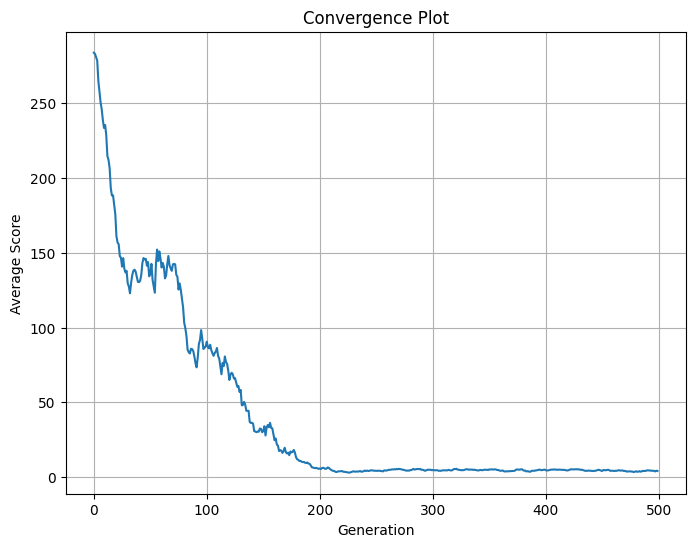

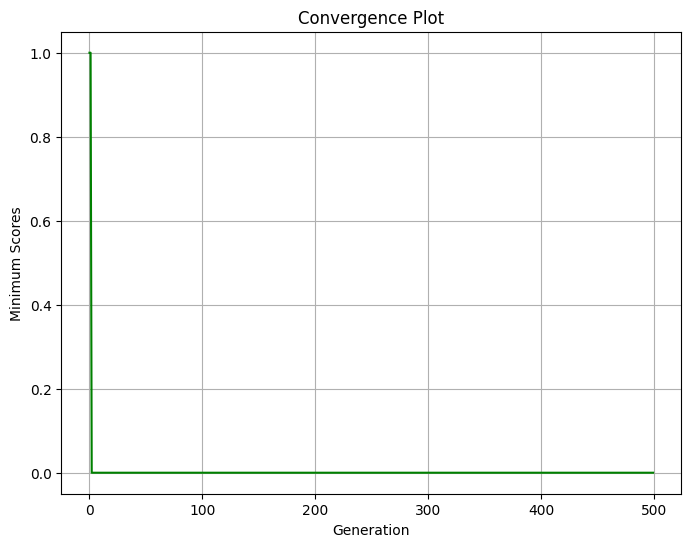

In [38]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,1)
    best_accuracy,bst_std=average_fraction(stats_min,1)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,1)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-21



In [1]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [2]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [3]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [4]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [5]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [6]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [7]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/4)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [8]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [9]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)
    # print(delta_fitness)

    # Check if the difference is smaller than a small threshold
    if delta_fitness>=0 and delta_fitness<=2:
      return True
    else:
      return False

In [10]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [11]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:10:44] |******************************************** | (499) 

best chromosome:  [87.19390276 89.60341681]
average score  accuracy:  0.001
average score standard deviation:  0.003
best score accuracy:  23.824
best score stanard deviation:  340.544
worst score accuracy:  0.0
worst score standard deviation:  0.0


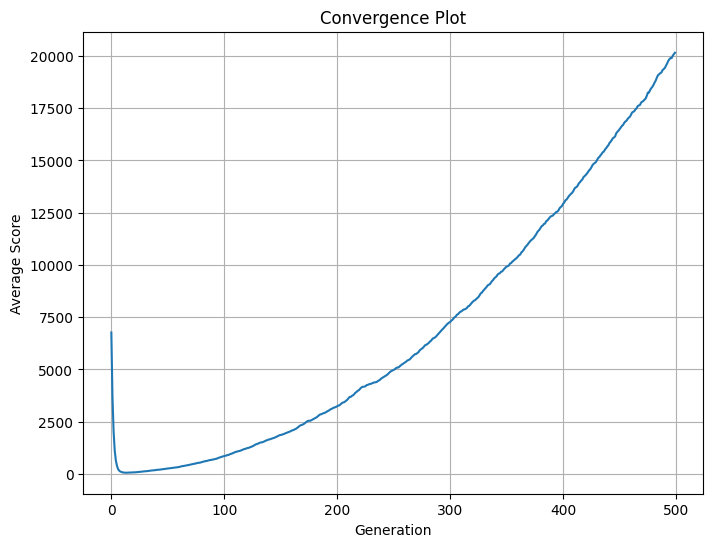

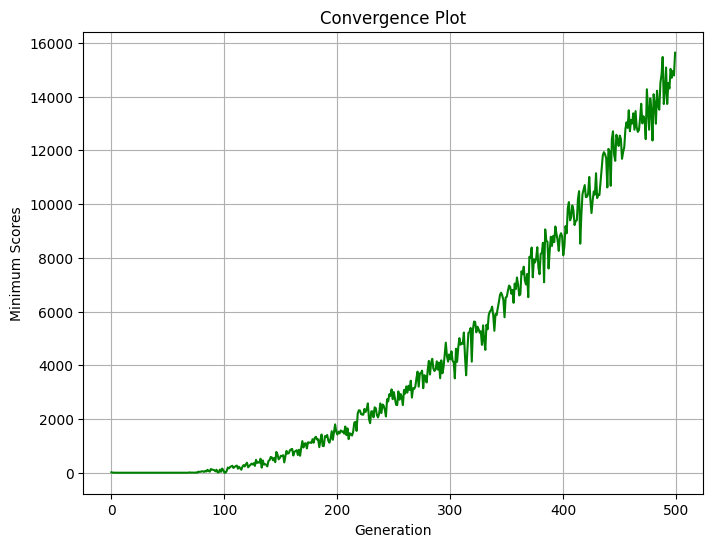

In [12]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,0)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-22



In [13]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [14]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [15]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [16]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    # selection_probabilities = 1 - np.exp(-1*ranks) commenting as it is taking extra cmputational power
    selection_probabilities = ranks / ranks.sum()
    # selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [17]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [18]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [19]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/4)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [20]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [21]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)
    # print(delta_fitness)

    # Check if the difference is smaller than a small threshold
    if delta_fitness>=0 and delta_fitness<=2:
      return True
    else:
      return False

In [22]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [23]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:07:04] |******************************************** | (499) 

best chromosome:  [0.01450989 0.01572193]
average score  accuracy:  0.413
average score standard deviation:  0.058
best score accuracy:  66496.636
best score stanard deviation:  516785.675
worst score accuracy:  0.021
worst score standard deviation:  0.006


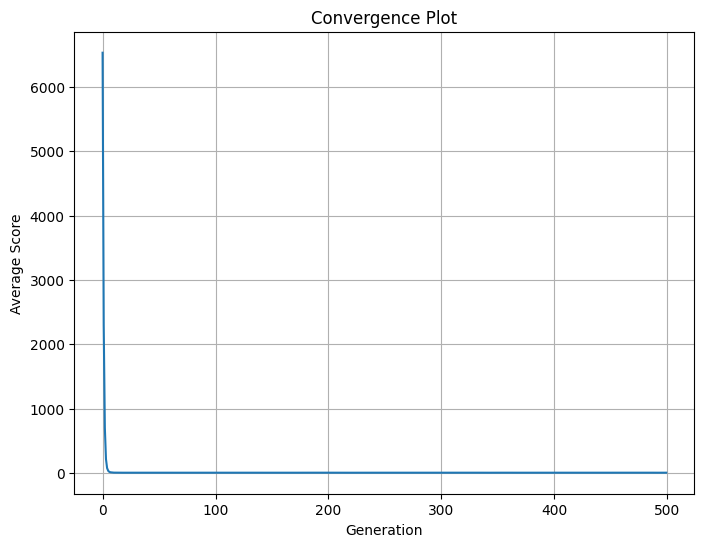

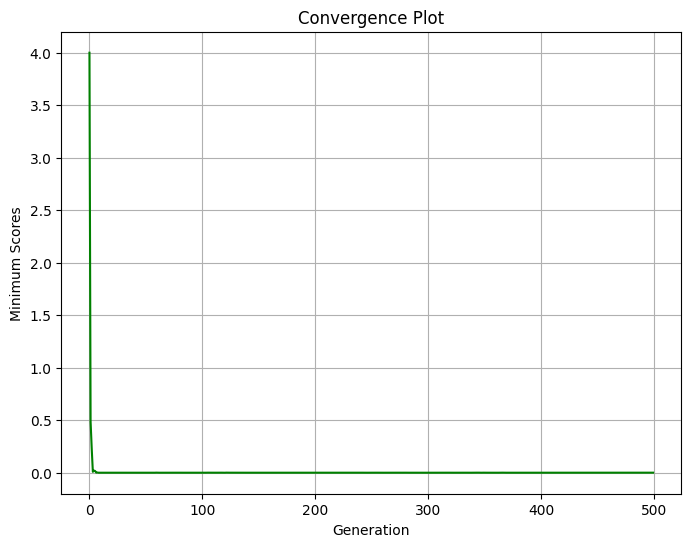

In [26]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,0)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-24



In [1]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [2]:
def initialize(sz,n_feat):
    population=[]
    for i in range(sz):
        chromosome=np.random.randint(low=-100,high=100,size=n_feat)
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [3]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [4]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [5]:
def select(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [6]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [7]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [8]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [9]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)
    # print(delta_fitness)

    # Check if the difference is smaller than a small threshold
    if delta_fitness>=0 and delta_fitness<=2:
      return True
    else:
      return False

In [10]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [11]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


 [elapsed time: 0:09:58] |******************************************** | (499) <ipython-input-11-8c581094c016>:4: RuntimeWarning: divide by zero encountered in double_scalars
  accuracies = [1 / abs(score - target_value) for score in score_list]
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


best chromosome:  [0 0]
average score  accuracy:  inf
average score standard deviation:  nan
best score accuracy:  inf
best score stanard deviation:  nan
worst score accuracy:  inf
worst score standard deviation:  nan


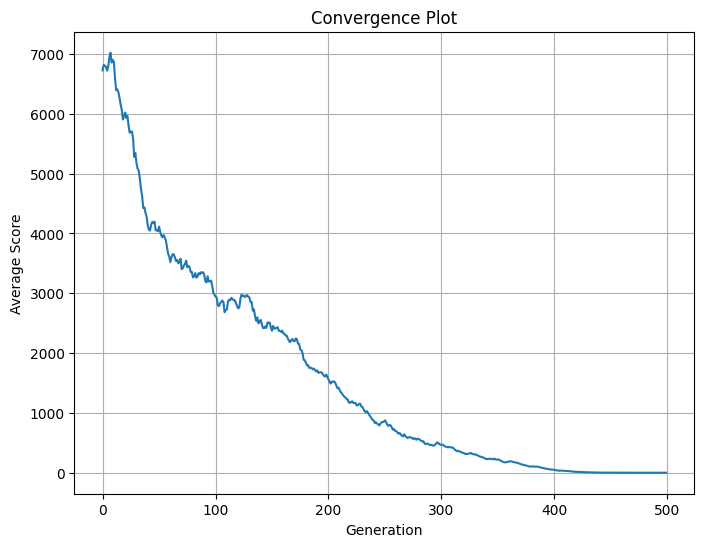

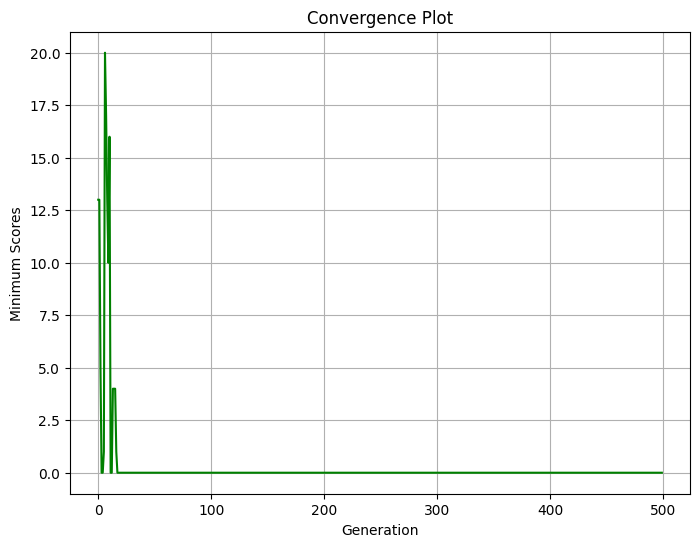

In [12]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,0)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,0)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-25


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)
    # print(delta_fitness)

    # Check if the difference is smaller than a small threshold
    if delta_fitness>=0 and delta_fitness<=2:
      return True
    else:
      return False

In [ ]:
import progressbar
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(sz,n_feat)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    widgets = [' [',
         progressbar.Timer(format= 'elapsed time: %(elapsed)s'),
         '] ',
           progressbar.Bar('*'),' (',
           progressbar.Counter(), ') ',
          ]
    bar = progressbar.ProgressBar(max_value=n_gens,
                              widgets=widgets).start()
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        bar.update(i)
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
 [elapsed time: 0:00:01] |********************************************* | (98) 

best chromosome:  [14.9963343  14.17660391]
mean accuracy:  0.5423
standard deviation:  0.3207


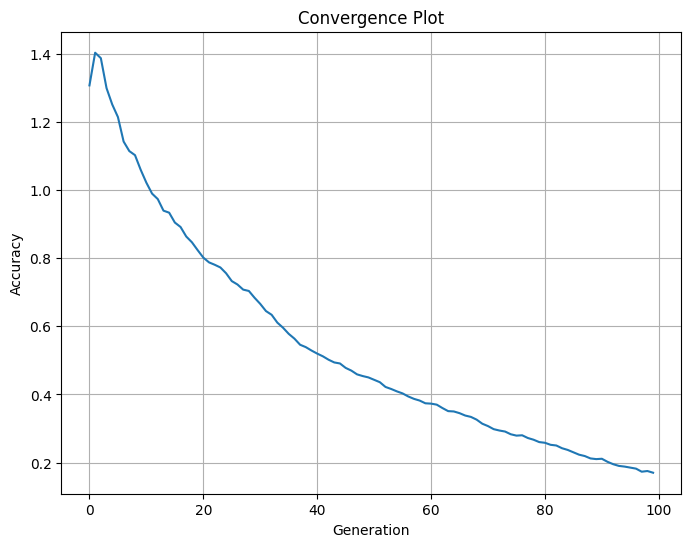

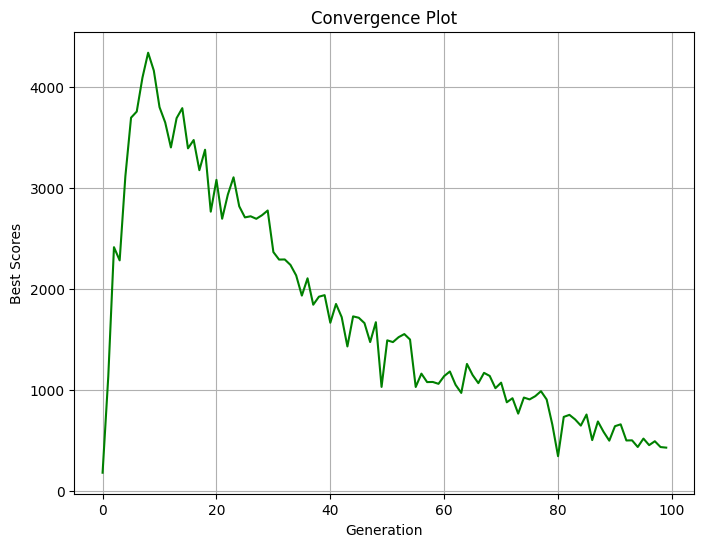

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,5000)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-26


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9


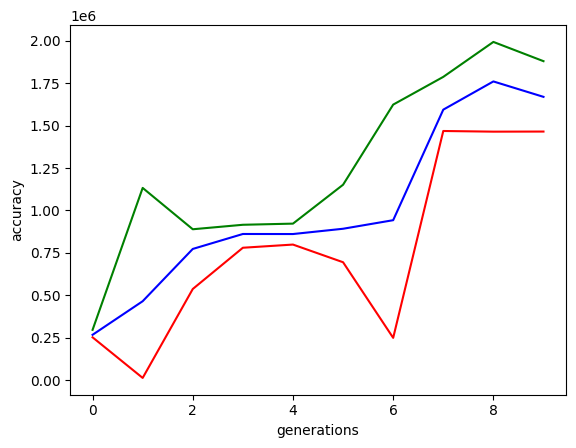

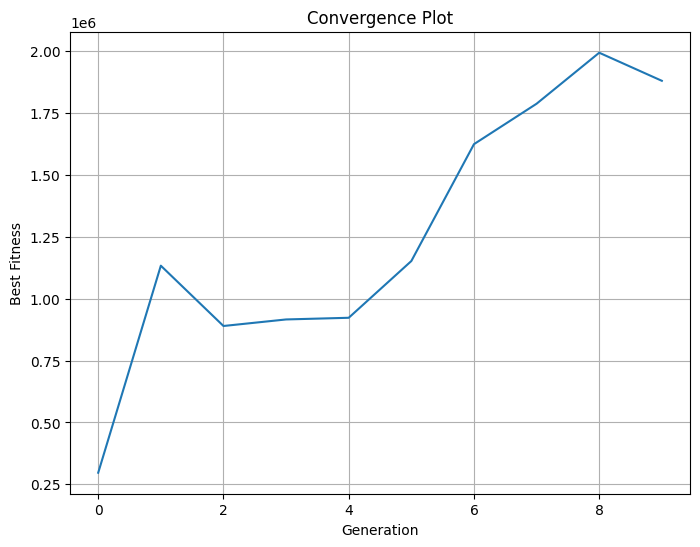

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,5000)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-27


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9


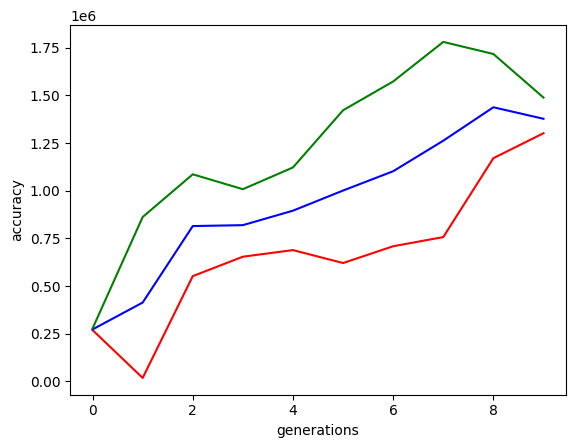

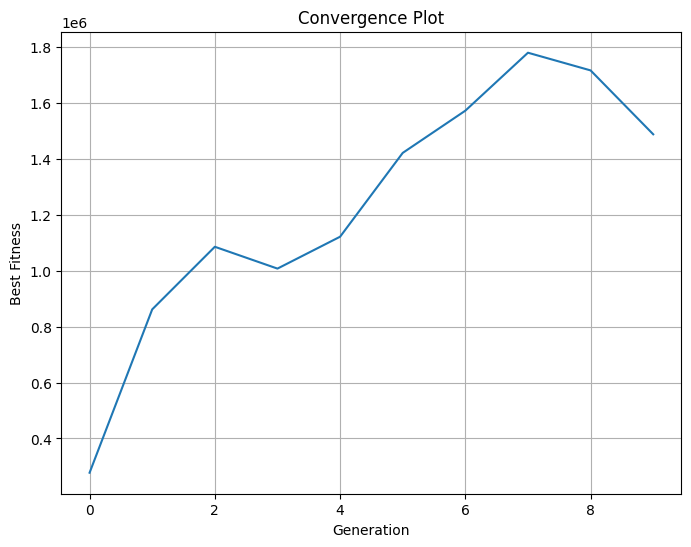

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,5000)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-28


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [ ]:
def select(scores,best_fit):
    selected_indiviuals_list=[]
    total_fitness=sum(scores)
    selection_prob=[fitness/total_fitness for fitness in scores]
    r=random.uniform(0,1/len(best_fit))
    prob_sum=0.0
    factor=1/len(best_fit)
    for i,x in enumerate(best_fit):
        prob_sum+=selection_prob[i]
        while r<prob_sum:
            r+=factor
            selected_indiviuals_list.append(best_fit[i])
    #print("selected individuals: ",selected_indiviuals,"\n")
    return selected_indiviuals_list



In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9


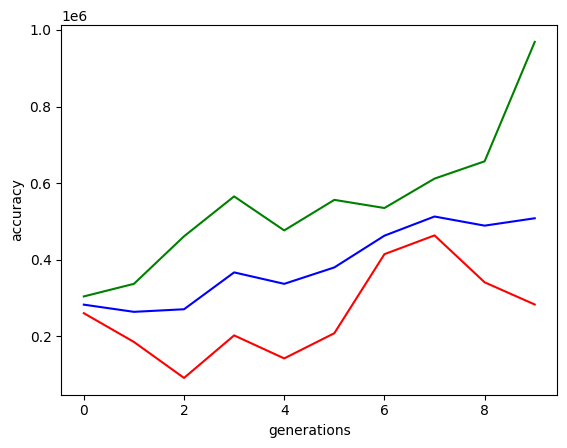

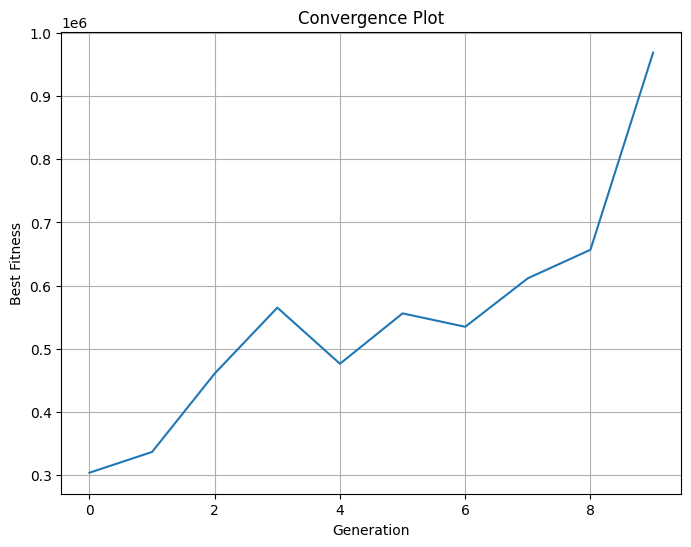

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,5000)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-29



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def selection(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores,pop_after_fit)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [ ]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9


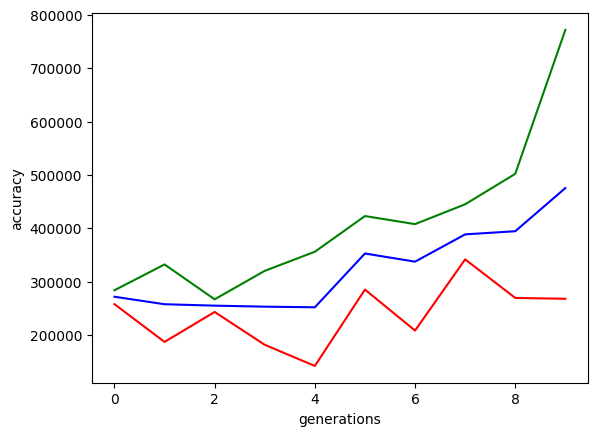

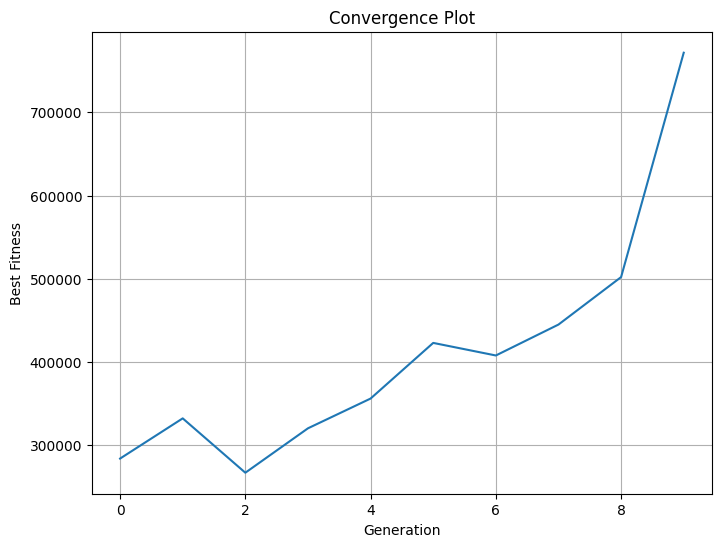

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,5000)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-30



In [51]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [64]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=[[-14, 10], [15, 7], [18, 0], [-20, 17], [14, -1], [8, -18], [-17, -20], [-9, 14], [20, 13], [-16, -13], [-6, -6], [12, -20], [20, -11], [2, -12], [14, 2], [14, 5], [-12, 14], [-19, 15], [7, 1], [18, 6], [3, 12], [16, -5], [6, -4], [10, -12], [12, 11], [11, -14], [18, 12], [-12, 5], [-18, -18], [1, -18], [-2, -19], [4, 10], [19, 3], [10, 4], [15, 11], [19, 5], [-4, -20], [-20, -5], [16, 8], [17, 15], [5, 10], [4, -5], [19, -1], [15, 11], [6, 16], [12, 5], [-15, 14], [-1, 6], [14, 1], [-11, 5], [-7, 2], [1, -3], [-2, 16], [-11, 12], [-9, 20], [-12, 14], [12, -4], [-1, 8], [-8, -2], [-10, 16], [7, -20], [6, -14], [1, -18], [-5, 14], [-3, 9], [-12, 4], [19, -9], [16, 10], [-5, 12], [6, -3], [18, 6], [-10, 10], [3, -4], [-12, -14], [19, -8], [1, 18], [-10, -6], [6, -12], [-18, 15], [3, 10], [11, 3], [17, 11], [-8, 12], [18, -12], [11, 1], [-4, -16], [-18, 9], [16, -1], [14, -16], [-13, -13], [-8, 0], [-15, -2], [14, -17], [-15, 8], [0, 18], [-6, 19], [5, -8], [18, -17], [-6, -16], [10, 11], [1, 13], [17, 8], [15, 13], [18, -17], [2, -7], [17, -13], [7, -19], [-20, -14], [-8, -1], [8, 3], [-14, -3], [-1, 11], [-3, -4], [9, -16], [12, 0], [-12, -17], [4, -2], [-1, 9], [-19, 11], [4, -7], [8, -13], [16, -8], [-5, -18], [14, 4], [-4, -8], [-6, 10], [-5, -5], [18, -18], [-9, 20], [8, 16], [-19, -20], [-4, -11], [16, 14], [-11, -4], [-17, 20], [18, -2], [20, 5], [15, -7], [17, -4], [12, 17], [15, 7], [14, 0], [19, 9], [-10, -16], [-5, -16], [0, 6], [0, -14], [-17, -15], [13, 15], [14, 1], [13, -19], [20, 0], [19, -13], [9, 10], [-16, 3], [-5, 0], [9, -6], [13, -18], [4, -11], [13, -7], [19, 19], [4, -15], [-17, 11], [-1, -12], [-8, 12], [2, 12], [6, -5], [-11, -11], [-8, -12], [15, -19], [-16, -15], [-11, -13], [11, 18], [-11, 4], [-7, -16], [15, 14], [-9, 0], [-14, -20], [3, -3], [11, 16], [-4, 19], [11, -3], [-6, -18], [-9, -11], [-12, 18], [-7, 2], [10, 20], [-8, 13], [16, 4], [14, -16], [-19, 16], [-7, -8], [10, 6], [6, 17], [-4, 15], [10, -18], [-17, 11], [19, 2], [2, 14], [-9, 6], [15, -19], [-13, -4], [6, -5], [7, -9], [-17, -1], [11, 7], [17, -7], [20, -5], [18, 16], [-13, -20], [-19, -7], [6, 2], [10, -9], [9, -18], [3, -2], [-10, 15], [-20, -5], [10, 17], [7, 20], [9, -11], [19, -19], [-10, 18], [-15, -17], [-8, 2], [15, 20], [-5, 11], [-3, -19], [-2, -2], [-19, 15], [18, 15], [-7, -13], [15, -12], [2, 2], [20, -18], [10, 0], [-7, -10], [18, -17], [10, -14], [9, -4], [0, -1], [-13, -17], [1, -19], [17, 16], [1, 9], [-20, 0], [-19, -20], [-8, -10], [-2, 18], [-11, 0], [-17, -11], [9, -8], [-11, -6], [3, -11], [-4, 3], [-6, 7], [-20, -12], [7, -12], [0, 11], [-10, -17], [-18, 19], [-12, 7], [-19, -5], [-1, 5], [-14, 12], [2, 15], [12, 5], [-12, -15], [20, 0], [-20, -11], [13, -10], [-12, -6], [17, 16], [13, -18], [-11, -8], [-15, -20], [18, -9], [-14, -15], [-16, -5], [-11, -15], [-13, 13], [-11, -20], [-1, 11], [10, 11], [15, -6], [-16, 7], [-4, -1], [20, -11], [9, -8], [-8, -9], [-1, -3], [-9, -8], [-14, -6], [19, -3], [20, -20], [15, 2], [18, -19], [-17, 3], [16, -9], [9, 2], [0, -1], [10, -2], [-16, 20], [6, -4], [-10, -6], [-17, 4], [19, 11], [3, 9], [11, 17], [-15, -15], [-6, 18], [-19, 17], [19, 2], [12, 1], [-7, -8], [-16, -3], [15, 18], [-18, -5], [18, 19], [17, 11], [3, 10], [3, -1], [-12, -5], [-2, 17], [-10, -8], [18, -12], [5, 9], [-16, -7], [6, -4], [8, 13], [-16, 11], [9, -8], [-8, 10], [-7, -14], [5, 2], [-18, -17], [12, 3], [2, -2], [8, -4], [-8, 2], [-7, 6], [10, 0], [11, 14], [9, -5], [-6, 7], [-19, 10], [-19, 15], [-4, 1], [15, 3], [7, -14], [-9, 6], [-19, 20], [-7, -16], [-7, 5], [-10, -7], [17, 0], [20, -17], [-2, 16], [-7, 4], [-7, -18], [-2, 13], [-9, -8], [3, -11], [20, -15], [16, -19], [-6, -18], [6, 17], [10, 11], [11, -4], [-11, 14], [19, 18], [12, 0], [-1, -12], [-5, -7], [-5, -17], [-10, -6], [-1, 3], [15, -15], [0, 2], [-1, -11], [-19, 9], [10, -14], [-20, 3], [4, -10], [-5, 20], [-1, 6], [6, 1], [11, 5], [-6, 8], [3, 18], [4, 13], [2, 13], [7, -11], [11, 2], [-2, 0], [-18, 15], [-4, -5], [-15, -10], [20, -19], [-10, -8], [-11, 13], [2, 20], [12, -16], [-10, 14], [-3, 12], [-3, -19], [-9, 13], [-3, -11], [4, 3], [2, 9], [9, 17], [-10, 6], [18, -16], [-10, 14], [-11, 7], [-12, -16], [-12, -16], [10, -2], [9, 2], [6, -17], [-16, -6], [0, 2], [-7, -3], [0, -9], [-16, -9], [8, 6], [-12, -3], [14, -1], [-17, 5], [18, 18], [-8, 3], [-10, -2], [6, 11], [0, -1], [-7, -19], [12, -10], [-14, -19], [-13, -12], [-10, -11], [-11, 18], [5, 17], [12, -8], [16, 6], [-12, -13], [2, -9], [5, 14], [10, 0], [-19, -10], [18, -15], [-3, -19], [20, 19], [-10, -12], [20, -14], [3, -12], [-1, -15], [17, -4], [-11, -15], [16, -15], [-20, 6], [-1, 9], [-11, -15], [-9, 15], [-3, -5], [16, -6], [-15, 3], [-13, 9], [8, -12], [15, 18], [11, -6], [9, 16], [3, -2], [11, 16], [4, -13], [-11, 9], [-13, -8], [-3, -2], [0, 19], [12, 5], [-8, 4], [19, 6], [-6, -3], [-8, 4], [-20, 0], [-15, -11], [-1, 9], [-6, -12], [-3, 15], [14, 10], [19, -20], [4, 8], [-2, 1], [-7, -10], [-20, 15], [-7, -8], [15, 2], [-8, -5], [-17, 2], [-16, -10], [18, -5], [-3, 10], [-2, 15], [7, 5], [6, 7], [-10, 7], [16, 5], [4, -12], [-6, -8], [5, 14], [12, -11], [0, -8], [-15, -12], [-19, -20], [-17, -16], [-3, -17], [12, -1], [-16, 13], [3, -11], [19, 7], [19, 18], [-6, -15], [-6, -9], [16, -9], [-8, 20], [11, -6], [-9, -16], [-4, 11], [-6, 12], [-7, -6], [9, 5], [-18, 11], [16, 15], [-18, -13], [-5, -14], [17, 0], [15, 20], [4, 0], [16, 6], [-13, 9], [-7, 3], [7, 7], [18, 3], [18, -18], [-10, 11], [-11, 3], [8, 16], [6, 8], [-11, -3], [5, -8], [14, 11], [-4, -3], [-5, 19], [-3, 13], [-13, -8], [1, -18], [-16, 14], [9, -17], [10, -16], [-10, -19], [-12, 7], [-20, 0], [-1, -15], [11, 2], [4, 2], [-18, 15], [20, 16], [9, -17], [6, -11], [10, -3], [-4, -17], [-4, 5], [20, 1], [13, -12], [11, 14], [-15, 6], [12, 0], [20, 17], [20, -4], [8, 14], [11, 7], [1, -19], [12, 17], [-13, -11], [2, -2], [10, 8], [20, 7], [20, 6], [-7, 14], [-6, 5], [2, -20], [2, 10], [-16, -1], [11, 16], [-6, -10], [18, -14], [17, 9], [-17, 15], [10, 20], [18, -19], [7, 14], [-9, 2], [-8, -4], [-7, -7], [10, 18], [-4, 20], [-15, 18], [-8, -10], [-11, -14], [-7, -8], [-14, -20], [1, -17], [-17, -14], [-4, -4], [10, 19], [16, 9], [-7, -17], [16, 13], [18, 11], [-11, -16], [-15, -15], [-16, 0], [19, -4], [-19, 1], [-2, 16], [16, 7], [12, 10], [-8, 12], [-17, 13], [1, 19], [14, 17], [13, 0], [-15, 2], [-13, 9], [-17, -15], [-4, 19], [-17, 12], [20, -5], [20, -15], [-10, -4], [11, 5], [-9, 18], [-7, 18], [-12, -13], [9, 10], [20, 0], [-1, 17], [5, -20], [-12, -4], [8, 5], [-17, -16], [13, -18], [-7, 14], [-5, -2], [-19, 15], [13, -15], [-2, 18], [7, -11], [20, 8], [12, -20], [13, 0], [-2, 6], [19, -14], [4, 14], [8, 5], [-20, 19], [-13, 2], [2, -16], [17, 2], [-18, 14], [14, 16], [14, 10], [4, -18], [-18, -3], [-15, 8], [-5, -3], [-2, 0], [7, -8], [-15, -17], [-11, 16], [1, 10], [12, -7], [-4, -2], [-14, -18], [7, -4], [19, 20], [14, 17], [-20, -16], [2, 5], [-16, -12], [13, 13], [-4, -18], [1, -20], [10, 12], [1, 19], [13, -16], [12, -8], [4, 2], [16, 17], [12, -17], [-20, 19], [2, -3], [8, -8], [-12, 7], [3, -8], [-11, 2], [1, 7], [5, -19], [8, -6], [5, 11], [20, -8], [12, -17], [-14, -12], [-4, -13], [18, 6], [-4, -4], [5, 18], [1, -7], [18, 17], [-20, 7], [3, 8], [9, 4], [16, 12], [8, -19], [-17, -18], [-16, -13], [-3, -17], [19, -18], [10, 15], [-5, 1], [-12, 0], [-19, -3], [5, -18], [-18, -7], [-7, 6], [6, 13], [-1, 6], [-11, 4], [-7, -17], [19, -8], [-1, 12], [13, 11], [-15, 18], [15, 4], [-9, -10], [6, -1], [-2, -11], [12, -15], [18, 17], [4, 15], [11, 19], [6, 10], [17, 15], [4, 3], [-2, -12], [3, 1], [10, -12], [14, -4], [1, 12], [-5, 20], [2, 7], [-18, 14], [-8, 15], [-19, 6], [-10, -3], [2, 11], [-11, -1], [18, 1], [-6, 2], [-10, 17], [-4, 15], [-5, -14], [-18, -14], [-9, 11], [13, 5], [-10, -19], [15, 8], [-18, -17], [-11, -16], [-1, -16], [-12, 16], [-10, -10], [12, 17], [-11, 7], [-18, -2], [15, -7], [-20, 1], [10, 5], [-10, -8], [1, 4], [15, 5], [9, -12], [20, -18], [9, 4], [15, 16], [-18, -1], [1, 19], [-12, -20], [-11, -6], [-14, -5], [-15, -5], [-3, -6], [14, 16], [10, 16], [-14, -13], [-3, 16], [-4, -8], [1, -10], [2, -3], [0, 7], [12, -14], [-14, 1], [1, -3], [-2, -5], [13, 5], [-18, 4], [-20, 0], [-14, 3], [-14, 1], [7, -1], [-6, -4], [1, -10], [-4, 3], [13, 7], [-19, 18], [7, 20], [-5, 11], [-16, -15], [-10, 6], [-7, 12], [14, -7], [-11, -12], [6, -10], [2, -18], [-12, 15], [1, -14], [19, -11], [-17, -19], [9, 1], [-6, 2], [-11, 0], [4, -16], [-6, -11], [-17, 16], [-9, -12], [-14, -19], [14, 16], [1, -19], [2, -5], [18, -20], [13, -8], [-4, 8], [9, 17], [-18, -19], [-19, 6], [1, 20], [9, 12], [7, 1], [-17, -13], [-17, 20], [-7, 7], [-14, 14], [-13, -7], [9, 15], [14, -18], [4, 14], [-3, 3], [-20, -18], [12, -15], [-16, -4], [-10, 6], [-15, -13], [-5, 15], [19, -8], [-4, -14], [13, 4], [-6, -16], [5, -1], [8, 19], [-11, -10], [17, -18], [-17, -8], [-19, 19], [-10, 3], [-18, 15], [10, -14], [-15, 20], [20, -18], [17, 14], [-3, -20], [3, -5], [-19, -10], [0, -12], [-6, 11], [11, -1], [-8, 13], [-4, 3], [17, -7], [6, 7], [1, -10], [-9, 10], [8, -3], [-9, -4], [-14, -9], [17, 20], [-8, -13], [18, -20], [3, -5], [2, -8], [-12, 3], [1, 3], [10, -17], [-4, 4], [-11, 14], [-16, -8], [2, 13], [0, 2], [-19, 4], [9, -10], [-5, 10], [18, 14], [10, -4], [19, 3], [-16, -8], [-16, 2], [-12, -13], [-5, 8], [9, 18], [-19, 2], [-8, -17], [-13, -8], [15, -9], [-19, 1], [8, 5], [-1, 5], [14, -19], [14, 13], [19, -11], [-12, -18], [4, -5], [6, -2], [6, 6], [14, 13], [3, 3], [18, 2], [8, -19], [7, 16], [12, -14], [3, -12], [1, -14], [8, 4], [2, 5], [14, 11], [-11, -15], [1, -3], [-2, -20], [11, 18], [-1, 6], [-13, 4], [8, -1], [-11, 0], [-7, -9], [1, 16], [18, 9], [8, 20], [7, -7], [-19, -8], [15, -12], [-13, -5], [-17, 1], [7, -16], [11, 8], [-13, -7], [-4, 18], [3, 15], [5, -15], [17, 1], [-13, 17], [-14, 7], [-16, -11], [-1, -8], [12, -7], [4, -17], [9, 1], [7, 7], [1, 5], [20, -16], [-18, -12], [5, -1], [3, -3], [-10, 14], [17, -7], [11, 8], [-10, -4], [-15, -16], [8, 14], [10, 1], [14, -9], [18, -7], [-13, 4], [11, 8], [7, 14], [-6, 17]]
  k_means_pp=KMeans(n_clusters=int(1000/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [53]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [54]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [55]:
def selection(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores,pop_after_fit)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [56]:
def getChilds(p1,p2,p3):
    # print("p1=============> \n",p1)
    mean=(p1+p2)/2
    # print("mean=============> \n",mean)
    # print("p1: ",p1,"\n=====================================================================")
    # print("p2: ",p2,"\n=====================================================================")
    # print("p3: ",p3,"\n=====================================================================")
    variance1=0.5*(abs(p1-p2))
    variance2=0.35*(abs(p3-mean))/math.sqrt(2)

    z1,z2=[],[]
    for var in variance1:
      # print("var: ",var)
      z1.append(np.random.normal(0,math.sqrt(var),1))
    for var in variance2:
      z2.append(np.random.normal(0,math.sqrt(var),1))

    e1=[]
    for i in range(len(p1)):
      if p2[i]-p1[i] !=0 and not math.isnan(p2[i]-p1[i]):
        ek_i=(p2[i]-p1[i])/abs(p2[i]-p1[i])
      else:
        ek_i=0
      e1.append(ek_i)

    e2=[]
    for i in range(len(p3)):
      if p3[i]-mean[i] !=0 and not math.isnan(p3[i]-mean[i]):
        ek_i=(p3[i]-mean[i])/abs(p3[i]-mean[i])
      else:
        ek_i=0
      e2.append(ek_i)

    # print("e2=============> \n",e2)
    # print("z1: ",z1*e1)
    z1_sum=0
    for i in range(len(p1)):
      z1_sum+=z1[i]*e1[i]
    # print("z1 sum: ",z1_sum)
    z2_sum=0

    for i in range(len(p3)):
     z2_sum+=z2[i]*e2[i]

    child1=mean+z1_sum+z2_sum
    child2=mean-z1_sum-z2_sum
    # print("child1=============> \n",child1)
    # print("child2=============> \n",child2)

    return child1,child2



In [68]:
def crossover(pop_selc,n_feat):
    pop_next_gen=[]
    sz=len(pop_selc)
    l=0
    for i in range(int(sz/4)):
        j=random.randint(0,sz-1)
        k=random.randint(0,sz-1)
        while j==i:
          j=random.randint(0,sz-1)
        while k==j or k==i:
          k=k=random.randint(0,sz-1)
        l+=1
        # print("iteration: ", l,"\n+++++++++++++++++++++++++++++++++++")
        p1,p2,p3=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy()),np.array(pop_selc[k].copy())
        c1,c2=getChilds(p1,p2,p3)
        pop_next_gen.append(c1)
        pop_next_gen.append(c2)
    # print("pop_next_gen -------------------------------------------\n",len(pop_next_gen))
    return pop_next_gen

In [58]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [69]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate,0.2)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [72]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) if abs(score - target_value) != 0 else 1 for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


best chromosome:  [ 2.68465113 -2.40205434]
average score  accuracy:  0.023
average score standard deviation:  0.006
best score accuracy:  0.134
best score stanard deviation:  0.375
worst score accuracy:  0.004
worst score standard deviation:  0.001


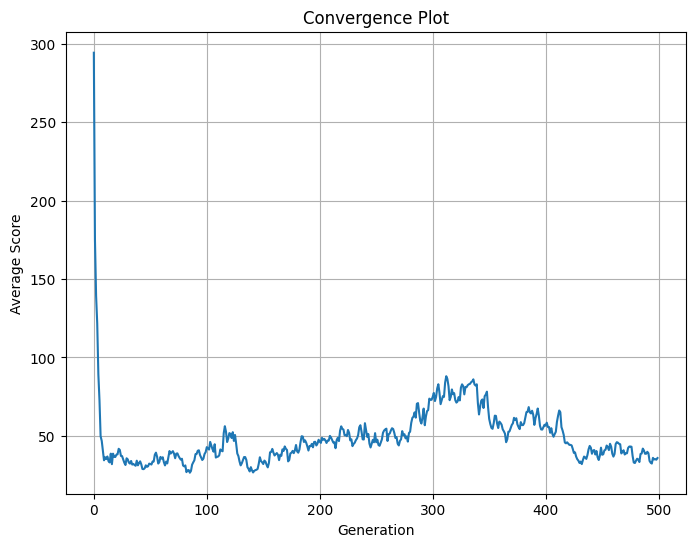

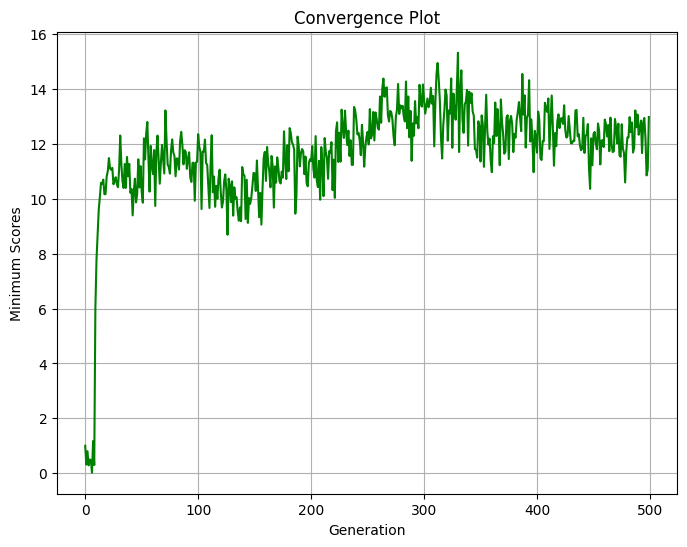

In [73]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,1)
    best_accuracy,bst_std=average_fraction(stats_min,1)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,1)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-31



In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def selection(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores,pop_after_fit)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(sz):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.rand()
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def average_fraction(score_list,target_value):

  # Calculate the accuracy for each score as the inverse of the absolute difference from the target
  accuracies = [1 / abs(score - target_value) for score in score_list]

  # Calculate the standard deviation of the accuracies
  accuracy_std_deviation = round(np.std(accuracies),3)

  # Calculate the average accuracy
  average_accuracy = round(np.mean(accuracies),3)

  return average_accuracy,accuracy_std_deviation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


iteration:  0
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9


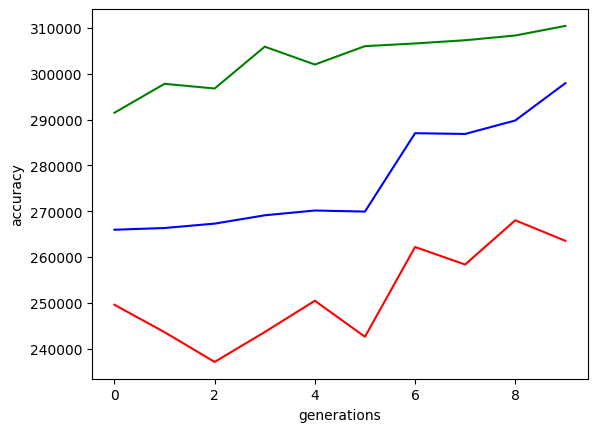

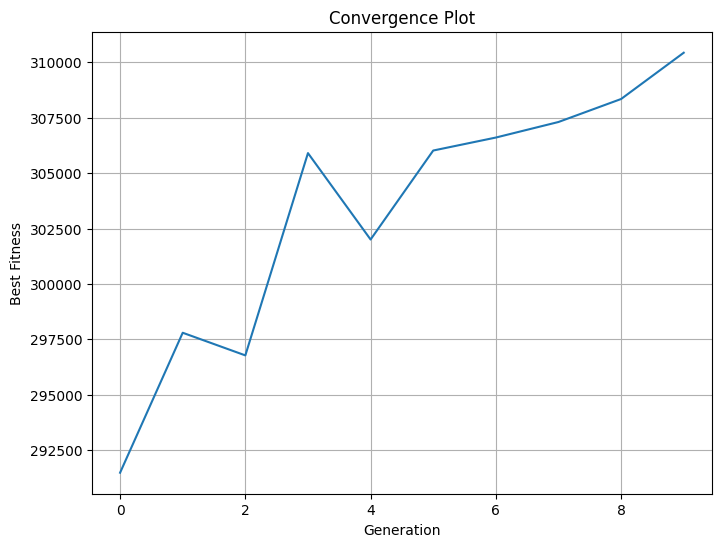

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,5000)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()

# GA-32



# New Section

In [88]:
import plotly.express as px

# Data for GA, Sphere, Rosenbrock, and Rastrigin
generation = list(range(1, 33))  # Adjust the number of generations as needed

# Data for Sphere, Rosenbrock, and Rastrigin
sphere_data = [0.02, 0.408, 0.562, 0.151, 0.13, 0.028, 0.112, 0.883, 0.105, 0.006, 0.306, 0.054, 0.001, 0.045, 0.45, 0.065, 0.004, 0.006, 0.29, 0.42, 0.001, 0.413, 0.192, 0.572, 0.125, 0.022, 0.191, 0.553, 0.279, 0.023, 0.04, 0.099]
rosenbrock_data = [0.066, 0.01, 0.0, 0.001, 0.252, 0.143, 0.16, 0.67, 0.0, 0.052, 0.0, 0.001, 0.001, 0.281, 0.004, 0.0, 0.044, 0.005, 0.002, 0.002, 0.014, 0.045, 0.903, 0.327, 0.094, 0.113, 0.138, 0.003, 0.005, 0.02, 0.0, 0.0]
rastrigin_data = [0.063, 0.118, 0.002, 0.0, 0.024, 0.303, 0.001, 0.52, 0.015, 0.02, 0.0, 0.0, 0.023, 0.01, 0.0, 0.0, 0.022, 0.081, 0.001, 0.005, 0.003, 0.003, 0.003, 0.005, 0.005, 0.003, 0.003, 0.004, 0.003, 0.002, 0.003, 0.003]

# Create interactive line graphs
fig = px.line(x=generation, y=[sphere_data, rosenbrock_data, rastrigin_data],
              labels={'x': 'Generation', 'y': 'Function Value'},
              title='GA Performance on Sphere, Rosenbrock, and Rastrigin Functions',
              color_discrete_sequence=['blue', 'green', 'red'])

# Customize the layout
fig.update_layout(legend_title_text='Function')

# Show the interactive graph
fig.show()


In [ ]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math
import pandas as pd
import random
import matplotlib.pyplot
import matplotlib.pyplot as plt
from tqdm import tqdm
import gc as gc

In [ ]:
from sklearn.cluster import KMeans

def initialize(sz,n_feat):
  random_data=np.random.randint(-100,100,(sz,n_feat))
  k_means_pp=KMeans(n_clusters=int(sz/4),init='k-means++',random_state=42)
  k_means_pp.fit(random_data)
  return k_means_pp.cluster_centers_

In [ ]:
def sphere_fitness_fun(population,n_feat):
  scores=[]
  for chromosome in population:
    score=sum(xi**2 for xi in chromosome)
    scores.append(score)
  scoresArr,popArr=np.array(scores),np.array(population)
  indices=np.argsort(scoresArr)
  score_list=list(scoresArr[indices])
  pop_list=list(popArr[indices])
  return score_list,pop_list


In [ ]:
def rank_based_prob(scores):
    ranks = np.argsort(np.argsort(-1 * np.array(scores))) + 1
    selection_probabilities = 1 - np.exp(-ranks)
    selection_probabilities /= selection_probabilities.sum()
    return selection_probabilities

In [ ]:
def selection(scores,pop_after_fit):
    population_nextgen = []
    selection_probabilities=rank_based_prob(scores,pop_after_fit)
    for i in range(len(selection_probabilities)):
        for k in range(2): # 2 parents
            pick = np.random.rand()
            current = 0
            for j in range(len(selection_probabilities)): # accum
                current += selection_probabilities[j]
                if current > pick: # our exit criteria based on the probability above
                    break
            population_nextgen.append(pop_after_fit[j].copy())
    return population_nextgen

In [ ]:
def getMask(n_feat):
    mask=[0]*n_feat
    for k in range(n_feat):
        if(random.random()<0.3 or random.random()==0.3 ):
            mask[k]=1
    return mask


In [ ]:
def crossover(pop_selc,n_feat):
    mask=getMask(n_feat)
    pop_next_gen=[]
    sz=len(pop_selc)
    for i in range(int(sz/2)):
        j=random.randint(0,sz-1)
        if j==i :
            if j==0:
              j+=1
            else:
              j=i-1
        c1,c2=np.array(pop_selc[i].copy()),np.array(pop_selc[j].copy())
        #print("this is c1",c1)
        for k in range(len(mask)):
            if mask[k] == 1:
                temp=c1[k]
                c1[k]=c2[k]
                c2[k]=temp
        pop_next_gen.append(c1)
    return pop_next_gen

In [ ]:
def mutation(pop_next_gen,n_feat,mutation_rate,std_dev):
    mutated_pop=[]
    #print("entered pop for mutation: ",len(pop_next_gen))
    for i in range(len(pop_next_gen)):
        chromosome=pop_next_gen[i].copy()
        for j in range(n_feat):
            if random.random()<mutation_rate:
                mutate=np.random.normal(loc=0,scale=std_dev)
                chromosome[j]+=mutate
        mutated_pop.append(chromosome.copy())
    #print("chromo mutated pop: ", len(chromosome_pop))
    return mutated_pop


In [ ]:
def generations(sz,n_feat,mutation_rate,n_gens):
    chromosomes_pop=initialize(n_feat,sz)
    stats_min = np.zeros(n_gens)
    stats_avg = np.zeros(n_gens)
    stats_max = np.zeros(n_gens)
    max_stagnation = 10
    fitness_history=[]
    best_score=[]
    best_chromo=[]
    converged_gen=1
    best_chromo=[]
    for i in range(n_gens):
        converged_gen+=1
        #print("generation no.: ", i)
        scores,best_fit=sphere_fitness_fun(chromosomes_pop,n_feat)
        best_chromo.append(best_fit[0].copy())
        if len(scores) == 0:
          break
        stats_min[i]=np.min(scores)
        #print("!===========!",stats_min)
        stats_max[i]=np.amax(scores)
        #print("!===========!",stats_max)
        stats_avg[i]=np.mean(scores)
        fitness_history.append(stats_avg[i])
        if is_converged(fitness_history, max_stagnation):
          print("GA converged due to fitness stagnation at generation",i+1)
          break
        #print("!===========!",stats_avg)
        # print("population size :", len(best_fit), "\n")
        pop_selc=select(scores,best_fit)
        if len(pop_selc) == 0 :
          break
        # print("population size after selection", len(pop_selc), "\n")
        # print("iteration: ",l)
        pop_cross_res=crossover(pop_selc,n_feat)
        # print("pop after crossover????????????????????\n",pop_cross_res)
        # print("population size after cross over", len(pop_cross_res), "\n")
        if len(pop_cross_res) == 0 :
          print("GA converged due to population decline at generation",i+1)
          break
        chromosomes_pop=mutation(pop_cross_res,n_feat,mutation_rate)
        if len(chromosomes_pop) == 0 :
          break
        # print("population size after mutation", len(pop_cross_res), "\n")
        #print("\n ==================================")
    return best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg

In [ ]:
def is_converged(fitness_history, max_stagnation):
    if len(fitness_history) < max_stagnation:
        return False

    # Calculate the difference between the best and worst fitness values
    delta_fitness = max(fitness_history) - min(fitness_history)
    # print(delta_fitness)

    # Check if the difference is smaller than a small threshold
    if delta_fitness>=0 and delta_fitness<=2:
      return True
    else:
      return False

best chromosome:  [99 93]
mean accuracy:  0.998
standard deviation:  0.0002


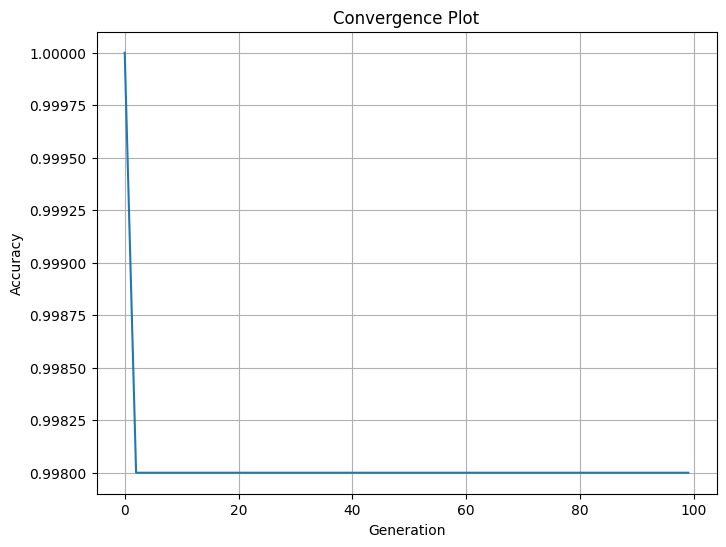

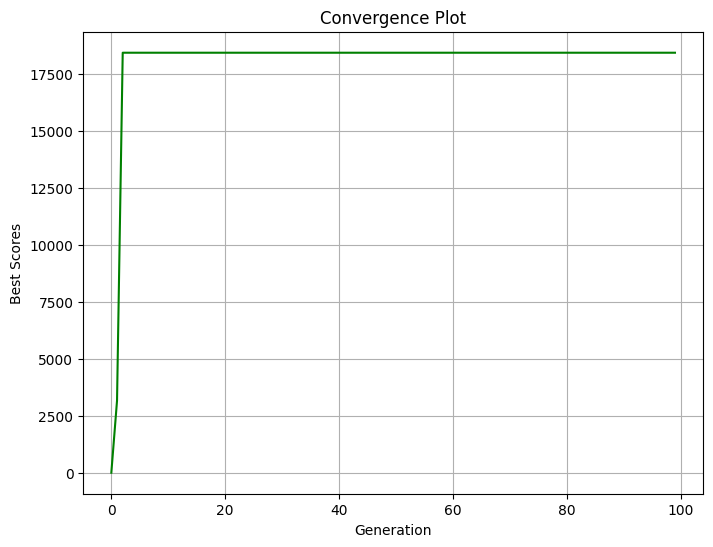

In [ ]:
if __name__ == "__main__":
    n_gen=500
    sz=2000
    n_feat=2
    mutation_rate=0.4
    best_fit,converged_gen,best_chromo,stats_min,stats_max,stats_avg=generations(sz,n_feat,mutation_rate,n_gen)
    actual_stats=[]
    print("best chromosome: ", best_chromo[len(best_chromo)-1])

    average_accuracy,std=average_fraction(stats_avg,5000)
    best_accuracy,bst_std=average_fraction(stats_min,0)
    worst_accuracy,wrst_std_deviation=average_fraction(stats_max,20000)
    print("average score  accuracy: ",average_accuracy)
    print("average score standard deviation: ",std)
    print("best score accuracy: ",best_accuracy)
    print("best score stanard deviation: ",bst_std)
    print("worst score accuracy: ",worst_accuracy)
    print("worst score standard deviation: ",wrst_std_deviation)

    for i in range(converged_gen-1):
      actual_stats.append(stats_min[i].copy())

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), stats_avg)
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Average Score')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(range(converged_gen-1), actual_stats,'g')
    plt.title('Convergence Plot')
    plt.xlabel('Generation')
    plt.ylabel('Minimum Scores')
    plt.grid(True)
    plt.show()